# This notebook is for developing plotting functions

In [6]:
import os
import pandas as pd
import pandas as pd
import numpy as np
import obspy

from obspy.clients.fdsn import Client
from obspy import Stream,UTCDateTime
from pnwstore.mseed import WaveformClient
from tqdm import tqdm
from matplotlib.backends.backend_pdf import PdfPages
from obspy.geodetics import locations2degrees, degrees2kilometers
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap

from obspy.clients.fdsn import Client as FDSNClient




In [2]:
# def subplots_cluster_scale_rand(mycatalog, mycatalog_picks, networks, channel, fig_title, file_title):
#     """
#     mycatalog: dataframe that contains only the unique events (e.g., mycatalog_picks.drop_duplicates(subset=['idx']).copy())
#     mycatalog_picks: all pick assignments csv file (e.g., pd.read_csv('../data/datasets_OR/all_pick_assignments_OR.csv'))
#     networks: csv file listing at least the networks of stations that picked the events in mycatalog (e.g., pd.read_csv('../data/networks/networks.csv))
#     channel: specify the direction of the channel (i.e., "?HZ", "?HE" or "?HN")
#     fig_title: title in a string
#     file_title: file title in a string
#     """
        
#     # Define the clients 
#     client_waveform = WaveformClient()
#     client2 = Client("IRIS")
#     client_ncedc = Client('NCEDC')

#     # Plot the earthquake moveout for one of the unmatched events for all stations 
#     events = mycatalog
#     picks = mycatalog_picks
#     events['datetime'] = pd.to_datetime(events['time'], utc=True)
#     networks = ','.join(list(networks['networks']))
#     p = PdfPages(file_title) 
    
#     # Randomly select 5 events
#     random_events = events.sample(n=3)
#     # random_events = events.sample(n=3,random_state=44)

#     for time in tqdm(random_events['time'], total=len(random_events['time'])):

#         idx = random_events.loc[random_events['datetime'] == time, 'idx'].values[0]
#         # print('idx:', idx)
#         picks_idx = picks.loc[picks['time'] == time]
#         pick_sta = np.unique(picks_idx['station'])

#         otime = UTCDateTime(str(random_events[random_events['idx'] == idx]["datetime"].values[0]))
#         distances = []
        

#         for station in pick_sta:
#             sta_inv = client2.get_stations(network=networks,
#                                            station=station, channel="?H?", 
#                                            starttime=otime - 1e8, endtime=otime + 1e8, level="response")
#             if len(sta_inv) == 0:
#                 continue
            
#             _network = sta_inv[0].code
#             slat = sta_inv[0][0].latitude
#             slon = sta_inv[0][0].longitude
#             olat = events.loc[events['idx']==idx, 'latitude'].values[0]
#             olon = events.loc[events['idx']==idx, 'longitude'].values[0]

#             dis1 = locations2degrees(olat, olon, slat, slon)
#             dist = degrees2kilometers(dis1)

#             distances.append([None, _network, station, dist])

#         # Sort distances
#         distances = sorted(distances, key=lambda item: item[-1])
#         # print(distances)
#         # Set up to define the xlim and ylim
#         max_y = 0
#         min_y = 0
#         min_y_count = 0 

#         max_x = 0
#         min_x = 0
#         min_x_count= 0

#         # Create a figure
#         fig, axs = plt.subplots(1, 4, figsize=(18, 6))
#         gs = fig.add_gridspec(3, hspace=0, figure=fig)
#         starttime = otime - 30
#         endtime = otime + 120
#         # Define texts
#         texts = []
#         # print('starttime:', starttime)
#         # print('endtime:', endtime)
#         for i, ii in enumerate(distances):
#             # print('Network:', ii[1])
#             # print('Station:', ii[2])
#             if ii[2] == 'KBO':
#                 continue
#             if ii[1] in ['NC', 'BK']:
#                 st = client_ncedc.get_waveforms(network=ii[1], station=ii[2], location="*", channel=channel, starttime=starttime, endtime=endtime)
#             elif ii[1] in networks: 
#                 st = client_waveform.get_waveforms(network=ii[1], station=ii[2], channel=channel, starttime=starttime, endtime=endtime)
#             else: 
#                 st = Stream()
#                 print(f"WARNING: No data for {ii[1]}.{ii[2]}.{channel} on {otime}.")    
#                 continue

#             if len(st) == 0:
#                 continue
#             sta_picks = picks_idx[picks_idx['station'] == ii[2]]
#             p_picks = sta_picks.loc[sta_picks['phase'] == 'P']
#             s_picks = sta_picks.loc[sta_picks['phase'] == 'S']

#             if len(s_picks) > 0:
#                 if max_x < UTCDateTime(s_picks.iloc[0]['time_pick']) - starttime:
#                     max_x = UTCDateTime(s_picks.iloc[0]['time_pick']+5) - starttime
#             elif len(p_picks) > 0:
#                 if max_x < UTCDateTime(p_picks.iloc[0]['time_pick']) - starttime: 
#                     max_x = UTCDateTime(p_picks.iloc[0]['time_pick']+5) - starttime
#             else:
#                 print('No picks for this station. Skipping.')
#                 continue 

#             if len(p_picks) > 0:
#                 if min_x_count == 0:
#                     if min_x < UTCDateTime(p_picks.iloc[0]['time_pick']) - starttime:
#                         min_x = UTCDateTime(p_picks.iloc[0]['time_pick']-5) - starttime
#                         min_x_count += 1           
#                 else:
#                     if min_x >= UTCDateTime(p_picks.iloc[0]['time_pick']) - starttime:
#                         min_x = UTCDateTime(p_picks.iloc[0]['time_pick']-5) - starttime            
#             elif len(s_picks) > 0:
#                 if min_x_count == 0:
#                     if min_x < UTCDateTime(s_picks.iloc[0]['time_pick'])- starttime:
#                         min_x = UTCDateTime(s_picks.iloc[0]['time_pick']-5)- starttime
#                         min_x_count += 1                
#                 else:
#                     if min_x >= UTCDateTime(s_picks.iloc[0]['time_pick'])- starttime:
#                         min_x = UTCDateTime(s_picks.iloc[0]['time_pick']-5) - starttime
#             else:
#                 print('No picks for this station. Skipping.')
#                 continue    

#             if min_y_count == 0:
#                 if min_y < ii[3]:
#                     min_y = ii[3] - 5
#                     min_y_count += 1           
#             else:
#                 if min_y >= ii[3]:
#                     min_y = ii[3] - 5 

#             max_y = ii[3] + 5

#         scaling_factor = (1/2) * (max_y - min_y)

#         chs = []  # Initialize chs here
#         for i, ii in enumerate(distances):

#             if ii[1] in ['NC', 'BK']:
#                 st = client_ncedc.get_waveforms(network=ii[1], station=ii[2], location="*", channel=channel, starttime=starttime, endtime=endtime)
#             elif ii[1] in networks: 
#                 st = client_waveform.get_waveforms(network=ii[1], station=ii[2], channel=channel, starttime=starttime, endtime=endtime)
#             else: 
#                 st = Stream()
#                 print(f"WARNING: No data for {ii[1]}.{ii[2]}.{channel} on {otime}.")    
#                 continue

#             if len(st) == 0:
#                 continue

#             _st = Stream()
#             has_HH = bool(st.select(channel="HH?"))
#             has_BH = bool(st.select(channel="BH?"))

#             if has_HH and has_BH:
#                 _st += st.select(channel="HH?")
#             elif has_HH:
#                 _st += st.select(channel="HH?")
#             elif has_BH:
#                 _st += st.select(channel="BH?")

#             st = _st

#             st = Stream(filter(lambda st: st.stats.sampling_rate > 10, st))
#             st.taper(max_percentage=0.05)
#             st.filter(type='bandpass', freqmin=2, freqmax=25)
#             st.merge(fill_value='interpolate')

#             unique_channels = set(tr.stats.channel for tr in st)
#             selected_traces = []

#             for ch in unique_channels:
#                 selected_traces.append(next(tr for tr in st if tr.stats.channel == ch))
#             st = Stream(selected_traces)

#             trim_st = st.copy()
#             sta_picks = picks_idx[picks_idx['station'] == ii[2]]
#             p_picks = sta_picks.loc[sta_picks['phase'] == 'P']
#             s_picks = sta_picks.loc[sta_picks['phase'] == 'S']

#             # Define the desired order of channels
#             desired_order = {
#                 'Z': ['HHZ', 'BHZ'],
#                 'N': ['HHN', 'HH1', 'BHN', 'BH1'],
#                 'E': ['HHE', 'HH2', 'BHE', 'BH2']
#             }

#             # Function to map channels to their desired order
#             def get_channel_priority(channel):
#                 for priority, (key, values) in enumerate(desired_order.items()):
#                     if channel in values:
#                         return priority
#                 return float('inf')  # Return a high value for channels not in the desired order

#             # Sort the traces in trim_st based on the desired order
#             trim_st = sorted(trim_st, key=lambda trace: get_channel_priority(trace.stats.channel))
            
#             trim_st = Stream(trim_st)
            
#             # print(trim_st)

#             # plt.figure()
#             # trim_st.plot()
#             # plt.show()
#             for iax in range(len(trim_st)):
#                 sampling_rate = trim_st[iax].stats.sampling_rate
#                 trim_st = trim_st.normalize()
#                 if i == 0:
#                     chs.append(str(trim_st[iax].stats.channel))

#                 if len(p_picks) > 0:
#                     tp = UTCDateTime(p_picks.iloc[0]['time_pick']) - otime + 30
#                     i1 = int((tp-5) * sampling_rate)
#                     i2 = int((tp+15) * sampling_rate)
#                 elif len(s_picks) > 0:
#                     ts = UTCDateTime(s_picks.iloc[0]['time_pick']) - otime + 30
#                     i1 = int((ts-10) * sampling_rate)
#                     i2 = int((ts+10) * sampling_rate)
#                 else:
#                     print(f"WARNING: No pick time for {ii[1]}.{ii[2]}.{channel} on {otime}.")

#                 offsets1 = ii[3]
#                 try: 
#                     wave = trim_st[iax].data
#                     wave = wave / (np.nanmax(wave[i1:i2], axis=-1) * 10)
#                 except:
#                     continue 

#                 # Plot the waveform
#                 axs[iax].plot(trim_st[iax].times(), wave * scaling_factor + offsets1, 
#                               color='black', alpha=0.7, lw=0.5)

#                 # Add the label only once per channel
#                 if i == 0:
#                     axs[iax].plot([], [], color='black', label=f"{trim_st[iax].stats.channel}")

#                 if len(p_picks) > 0:
#                     axs[iax].vlines(UTCDateTime(p_picks.iloc[0]['time_pick']) - otime + 30, offsets1 - (1/35) * scaling_factor, 
#                                     offsets1 + (1/35) * scaling_factor, color='r')
#                 if len(s_picks) > 0:
#                     axs[iax].vlines(UTCDateTime(s_picks.iloc[0]['time_pick']) - otime + 30, offsets1 - (1/35) * scaling_factor, 
#                                     offsets1 + (1/35) * scaling_factor, color='b')

#             texts.append([ii[2], ii[3]])

#         for iax in range(3):
#             for i, ii in enumerate(texts):
#                 offsets1 = ii[1]
#                 axs[iax].text(max_x + 0.5, offsets1, 
#                               [ii[0]], fontsize=8, verticalalignment='bottom')
#             if chs:  # Only set ncol if chs is not empty
#                 axs[iax].legend(loc='upper right', ncol=len(chs), handlelength=0,handletextpad=0, columnspacing=0.5)  # Adjust handletextpad and columnspacing
#             axs[iax].set_ylim([min_y, max_y])
#             axs[iax].set_xlim([min_x, max_x])
#             axs[iax].grid(alpha=0.5)

#         fig.supxlabel('Time [sec]', y=0.07)
#         fig.supylabel('Distance [km]')
#         fig.suptitle(f"{fig_title}: Origin Time={otime}, \n Latitude={round(events[events['idx']==idx]['latitude'].values[0], 2)}, Longtitude={round(events[events['idx']==idx]['longitude'].values[0], 2)}, Depth={round(events[events['idx']==idx]['depth'].values[0], 2)}", y=1)

#         m = Basemap(projection='merc', llcrnrlat=40, urcrnrlat=50, llcrnrlon=-130, urcrnrlon=-120, resolution='i', ax=axs[3])
#         m.drawcoastlines()
#         m.drawcountries()
#         m.drawstates()
#         m.drawmapboundary()
#         m.drawparallels(np.arange(38, 51, 1), labels=[1, 0, 0, 0])
#         m.drawmeridians(np.arange(-132, -119, 1), labels=[0, 0, 0, 1])
#         x, y = m(events[events['idx']==idx]['longitude'].values[0], events[events['idx']==idx]['latitude'].values[0])
#         m.plot(x, y, 'ro', markersize=9)
#         axs[3].set_title('Event Location')
        
#         fig.savefig(p, format='pdf')  

#     p.close()

In [14]:
def subplots_cluster_scale(mycatalog, mycatalog_picks, networks, channel, fig_title, filepath):
    """
    mycatalog: dataframe that contains only the unique events (e.g., mycatalog_picks.drop_duplicates(subset=['idx']).copy())
    mycatalog_picks: all pick assignments csv file (e.g., pd.read_csv('../data/datasets_OR/all_pick_assignments_OR.csv'))
    networks: csv file listing at least the networks of stations that picked the events in mycatalog (e.g., pd.read_csv('../data/networks/networks.csv))
    channel: specify the direction of the channel (i.e., "?HZ", "?HE" or "?HN")
    fig_title: title in a string
    filepath: file path in a string
    """
        
    # Define the clients 
    client_waveform = WaveformClient()
    client2 = Client("IRIS")
    client_ncedc = Client('NCEDC')

    # Plot the earthquake moveout for one of the unmatched events for all stations 
    events = mycatalog
    picks = mycatalog_picks
    events['datetime'] = pd.to_datetime(events['time'], utc=True)
    picks['datetime'] = pd.to_datetime(picks['time'], utc=True)
    networks = ','.join(list(networks['networks']))
    p = PdfPages(filepath) 


    for idx, time in tqdm(zip(events['idx'],events['time']), total=len(events['time'])):
        
        condition = (events['idx'] == idx) & (events['datetime'] == time)
        picks_idx = picks.loc[picks['time'] == time]

        pick_sta = np.unique(picks_idx['station'])
        otime = UTCDateTime(str(events[condition]["datetime"].values[0]))
        distances = []
        

        for station in pick_sta:
            sta_inv = client2.get_stations(network=networks,
                                           station=station, channel="?H?", 
                                           starttime=otime - 1e8, endtime=otime + 1e8, level="response")
            if len(sta_inv) == 0:
                continue
            
            _network = sta_inv[0].code
            slat = sta_inv[0][0].latitude
            slon = sta_inv[0][0].longitude
            olat = events.loc[condition, 'latitude'].values[0]
            olon = events.loc[condition, 'longitude'].values[0]
            dis1 = locations2degrees(olat, olon, slat, slon)
            dist = degrees2kilometers(dis1)

            distances.append([None, _network, station, dist])

        # Sort distances
        distances = sorted(distances, key=lambda item: item[-1])
        
        # Set up to define the xlim and ylim
        max_y = 0
        min_y = 0
        min_y_count = 0 

        max_x = 0
        min_x = 0
        min_x_count= 0

        # Create a figure
        fig, axs = plt.subplots(1, 4, figsize=(18, 6))
        gs = fig.add_gridspec(3, hspace=0, figure=fig)
        starttime = otime - 30
        endtime = otime + 120
        # Define texts
        texts = []
        # print('starttime:', starttime)
        # print('endtime:', endtime)
        print(distances)
        for i, ii in enumerate(distances):
            # print('Network:', ii[1])
            # print('Station:', ii[2])
            
            ####################
            time_trunc1 = UTCDateTime(starttime.datetime.replace(hour=0, minute=0, second=0, microsecond=0))
            time_trunc2 = UTCDateTime(endtime.datetime.replace(hour=0, minute=0, second=0, microsecond=0))                
            # time_trunc_prev_day = time_trunc1 - pd.Timedelta(microseconds=1)
            time_trunc_prev_day = time_trunc2 - pd.Timedelta(microseconds=1)


#                 dt1 = starttime_st - time_trunc1
#                 dt2 = starttime_st - time_trunc2
            
            # dt_start = starttime_st - time_trunc1
            dt_end = endtime - time_trunc1
                
            if dt_end > pd.Timedelta(days=1).total_seconds():
                # If start and end times are on different days
                print('test4')
                if ii[1] in ['NC', 'BK']:
                # Query waveforms
                    st1 = client_ncedc.get_waveforms(network=ii[1], station=ii[2],
                                                    location="*", channel="?H?",starttime=starttime,
                                                    endtime=time_trunc_prev_day)

                elif ii[1] in networks: 
                    st1 = client_waveform.get_waveforms(network=ii[1], station=ii[2],
                                                        channel='?H?',starttime=starttime, endtime=time_trunc_prev_day)

                else: 
                    st1 =  Stream()
                    print(f"WARNING: No data for {ii[1]}.{ii[2]}.{channel} on {otime}.")    
                    continue
                
                if ii[1] in ['NC', 'BK']:
                # Query waveforms
                    st2 = client_ncedc.get_waveforms(network=ii[1], station=ii[2],
                                                    location="*", channel="?H?",starttime=time_trunc2,
                                                    endtime=endtime)

                elif ii[1] in networks: 
                    st2 = client_waveform.get_waveforms(network=ii[1], station=ii[2],
                                                        channel='?H?',starttime=time_trunc2, endtime=endtime)

                else: 
                    st2 =  Stream()
                    print(f"WARNING: No data for {ii[1]}.{ii[2]}.{channel} on {otime}.")    
                    continue
                    
                st = st1+st2

            else: 
                print('i:', i)
                if ii[1] in ['NC', 'BK']:
            # Query waveforms[
                    st = client_ncedc.get_waveforms(network=ii[1], station=ii[2],
                                                    location="*", channel="?H?",starttime=starttime,
                                                    endtime=endtime)

                elif ii[1] in networks: 
                    st = client_waveform.get_waveforms(network=ii[1], station=ii[2],
                                                        channel='?H?',starttime=starttime, endtime=endtime)

                else: 
                    st =  Stream()
                    print(f"WARNING: No data for {ii[1]}.{ii[2]}.{channel} on {otime}.")    
                    continue
                
            #####################
            
          

            if len(st) == 0:
                continue
            sta_picks = picks_idx[picks_idx['station'] == ii[2]]
            p_picks = sta_picks.loc[sta_picks['phase'] == 'P']
            s_picks = sta_picks.loc[sta_picks['phase'] == 'S']

            if len(s_picks) > 0:
                if max_x < UTCDateTime(s_picks.iloc[0]['time_pick']) - starttime:
                    max_x = UTCDateTime(s_picks.iloc[0]['time_pick']+5) - starttime
            elif len(p_picks) > 0:
                if max_x < UTCDateTime(p_picks.iloc[0]['time_pick']) - starttime: 
                    max_x = UTCDateTime(p_picks.iloc[0]['time_pick']+5) - starttime
            else:
                print('No picks for this station. Skipping.')
                continue 

            if len(p_picks) > 0:
                if min_x_count == 0:
                    if min_x < UTCDateTime(p_picks.iloc[0]['time_pick']) - starttime:
                        min_x = UTCDateTime(p_picks.iloc[0]['time_pick']-5) - starttime
                        min_x_count += 1           
                else:
                    if min_x >= UTCDateTime(p_picks.iloc[0]['time_pick']) - starttime:
                        min_x = UTCDateTime(p_picks.iloc[0]['time_pick']-5) - starttime            
            elif len(s_picks) > 0:
                if min_x_count == 0:
                    if min_x < UTCDateTime(s_picks.iloc[0]['time_pick'])- starttime:
                        min_x = UTCDateTime(s_picks.iloc[0]['time_pick']-5)- starttime
                        min_x_count += 1                
                else:
                    if min_x >= UTCDateTime(s_picks.iloc[0]['time_pick'])- starttime:
                        min_x = UTCDateTime(s_picks.iloc[0]['time_pick']-5) - starttime
            else:
                print('No picks for this station. Skipping.')
                continue    

            if min_y_count == 0:
                if min_y < ii[3]:
                    min_y = ii[3] - 5
                    min_y_count += 1           
            else:
                if min_y >= ii[3]:
                    min_y = ii[3] - 5 

            max_y = ii[3] + 5

        scaling_factor = (1/2) * (max_y - min_y)

        chs = []  # Initialize chs here
        for i, ii in enumerate(distances):

            time_trunc1 = UTCDateTime(starttime.datetime.replace(hour=0, minute=0, second=0, microsecond=0))
            time_trunc2 = UTCDateTime(endtime.datetime.replace(hour=0, minute=0, second=0, microsecond=0))                
            # time_trunc_prev_day = time_trunc1 - pd.Timedelta(microseconds=1)
            time_trunc_prev_day = time_trunc2 - pd.Timedelta(microseconds=1)


#                 dt1 = starttime_st - time_trunc1
#                 dt2 = starttime_st - time_trunc2
            
            # dt_start = starttime_st - time_trunc1
            dt_end = endtime - time_trunc1
                
            if dt_end > pd.Timedelta(days=1).total_seconds():
                # If start and end times are on different days
                print('test4')
                if ii[1] in ['NC', 'BK']:
                # Query waveforms
                    st1 = client_ncedc.get_waveforms(network=ii[1], station=ii[2],
                                                    location="*", channel="?H?",starttime=starttime,
                                                    endtime=time_trunc_prev_day)

                elif ii[1] in networks: 
                    st1 = client_waveform.get_waveforms(network=ii[1], station=ii[2],
                                                        channel='?H?',starttime=starttime, endtime=time_trunc_prev_day)

                else: 
                    st1 =  Stream()
                    print(f"WARNING: No data for {ii[1]}.{ii[2]}.{channel} on {otime}.")    
                    continue
                
                if ii[1] in ['NC', 'BK']:
                # Query waveforms
                    st2 = client_ncedc.get_waveforms(network=ii[1], station=ii[2],
                                                    location="*", channel="?H?",starttime=time_trunc2,
                                                    endtime=endtime)

                elif ii[1] in networks: 
                    st2 = client_waveform.get_waveforms(network=ii[1], station=ii[2],
                                                        channel='?H?',starttime=time_trunc2, endtime=endtime)

                else: 
                    st2 =  Stream()
                    print(f"WARNING: No data for {ii[1]}.{ii[2]}.{channel} on {otime}.")    
                    continue
                    
                st = st1+st2

            else: 
                if ii[1] in ['NC', 'BK']:
            # Query waveforms
                    st = client_ncedc.get_waveforms(network=ii[1], station=ii[2],
                                                    location="*", channel="?H?",starttime=starttime,
                                                    endtime=endtime_st)

                elif ii[1] in networks: 
                    st = client_waveform.get_waveforms(network=ii[1], station=ii[2],
                                                        channel='?H?',starttime=starttime, endtime=endtime)

                else: 
                    st =  Stream()
                    print(f"WARNING: No data for {ii[1]}.{ii[2]}.{channel} on {otime}.")    
                    continue

            if len(st) == 0:
                continue

            _st = Stream()
            has_HH = bool(st.select(channel="HH?"))
            has_BH = bool(st.select(channel="BH?"))

            if has_HH and has_BH:
                _st += st.select(channel="HH?")
            elif has_HH:
                _st += st.select(channel="HH?")
            elif has_BH:
                _st += st.select(channel="BH?")

            st = _st

            st = Stream(filter(lambda st: st.stats.sampling_rate > 10, st))
            st.taper(max_percentage=0.05)
            st.filter(type='bandpass', freqmin=2, freqmax=25)
            st.merge(fill_value='interpolate')

            unique_channels = set(tr.stats.channel for tr in st)
            selected_traces = []

            for ch in unique_channels:
                selected_traces.append(next(tr for tr in st if tr.stats.channel == ch))
            st = Stream(selected_traces)

            trim_st = st.copy()
            sta_picks = picks_idx[picks_idx['station'] == ii[2]]
            p_picks = sta_picks.loc[sta_picks['phase'] == 'P']
            s_picks = sta_picks.loc[sta_picks['phase'] == 'S']

            # Define the desired order of channels
            desired_order = {
                'Z': ['HHZ', 'BHZ'],
                'N': ['HHN', 'HH1', 'BHN', 'BH1'],
                'E': ['HHE', 'HH2', 'BHE', 'BH2']
            }

            # Function to map channels to their desired order
            def get_channel_priority(channel):
                for priority, (key, values) in enumerate(desired_order.items()):
                    if channel in values:
                        return priority
                return float('inf')  # Return a high value for channels not in the desired order

            # Sort the traces in trim_st based on the desired order
            trim_st = sorted(trim_st, key=lambda trace: get_channel_priority(trace.stats.channel))
            
            trim_st = Stream(trim_st)
            
            # plt.figure()
            # trim_st.plot()
            # plt.show()
            for iax in range(len(trim_st)):
                sampling_rate = trim_st[iax].stats.sampling_rate
                trim_st = trim_st.normalize()
                if i == 0:
                    chs.append(str(trim_st[iax].stats.channel))

                if len(p_picks) > 0:
                    tp = UTCDateTime(p_picks.iloc[0]['time_pick']) - otime + 30
                    i1 = int((tp-5) * sampling_rate)
                    i2 = int((tp+15) * sampling_rate)
                elif len(s_picks) > 0:
                    ts = UTCDateTime(s_picks.iloc[0]['time_pick']) - otime + 30
                    i1 = int((ts-10) * sampling_rate)
                    i2 = int((ts+10) * sampling_rate)
                else:
                    print(f"WARNING: No pick time for {ii[1]}.{ii[2]}.{channel} on {otime}.")

            

                offsets1 = ii[3]
                try: 
                    wave = trim_st[iax].data
                    wave = wave / (np.nanmax(wave[i1:i2], axis=-1) * 10)
                except:
                    continue 

                # Plot the waveform
                axs[iax].plot(trim_st[iax].times(), wave * scaling_factor + offsets1, 
                              color='black', alpha=0.7, lw=0.5)

                # Add the label only once per channel
                if i == 0:
                    axs[iax].plot([], [], color='black', label=f"{trim_st[iax].stats.channel}")

                if len(p_picks) > 0:
                    axs[iax].vlines(UTCDateTime(p_picks.iloc[0]['time_pick']) - otime + 30, offsets1 - (1/35) * scaling_factor, 
                                    offsets1 + (1/35) * scaling_factor, color='r')
                if len(s_picks) > 0:
                    axs[iax].vlines(UTCDateTime(s_picks.iloc[0]['time_pick']) - otime + 30, offsets1 - (1/35) * scaling_factor, 
                                    offsets1 + (1/35) * scaling_factor, color='b')

            texts.append([ii[2], ii[3]])

        for iax in range(3):
            for i, ii in enumerate(texts):
                offsets1 = ii[1]
                axs[iax].text(max_x + 0.5, offsets1, 
                              [ii[0]], fontsize=8, verticalalignment='bottom')
            if chs:  # Only set ncol if chs is not empty
                axs[iax].legend(loc='upper right', ncol=len(chs), handlelength=0,handletextpad=0, columnspacing=0.5)  # Adjust handletextpad and columnspacing
            axs[iax].set_ylim([min_y, max_y])
            axs[iax].set_xlim([min_x, max_x])
            axs[iax].grid(alpha=0.5)

        fig.supxlabel('Time [sec]', y=0.07)
        fig.supylabel('Distance [km]')
        fig.suptitle(f"{fig_title}: Origin Time={otime}, \n Latitude={round(events[condition]['latitude'].values[0], 2)}, Longtitude={round(events[condition]['longitude'].values[0], 2)}, Depth={round(events[condition]['depth'].values[0], 2)}", y=1)

        m = Basemap(projection='merc', llcrnrlat=38, urcrnrlat=51, llcrnrlon=-132, urcrnrlon=-119, resolution='i', ax=axs[3])
        m.drawcoastlines()
        m.drawcountries()
        m.drawstates()
        m.drawmapboundary()
        m.drawparallels(np.arange(38, 51, 1), labels=[1, 0, 0, 0])
        m.drawmeridians(np.arange(-132, -119, 1), labels=[0, 0, 0, 1])

        plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

        x, y = m(events[condition]['longitude'].values[0], events[condition]['latitude'].values[0])
        m.plot(x, y, 'ro', markersize=9)
        axs[3].set_title('Event Location')
        
        fig.savefig(p, format='pdf')  

    p.close()

In [33]:
from datetime import datetime
def subplots_cluster_scale_rand_original(mycatalog, mycatalog_picks, networks, channel, fig_title, path):
    """
    mycatalog: dataframe that contains only the unique events (e.g., mycatalog_picks.drop_duplicates(subset=['idx']).copy())
    mycatalog_picks: all pick assignments csv file (e.g., pd.read_csv('../data/datasets_OR/all_pick_assignments_OR.csv'))
    networks: csv file listing at least the networks of stations that picked the events in mycatalog (e.g., pd.read_csv('../data/networks/networks.csv))
    channel: specify the direction of the channel (i.e., "?HZ", "?HE" or "?HN")
    fig_title: title in a string
    filepath: file path in a string
    """
    os.makedirs(path,exist_ok=True)

    # Define the clients 
    client_waveform = WaveformClient()
    client2 = Client("IRIS")
    client_ncedc = Client('NCEDC')

    # Plot the earthquake moveout for one of the unmatched events for all stations 
    events = mycatalog
    picks = mycatalog_picks
    events['datetime'] = pd.to_datetime(events['time'], utc=True)
    picks['datetime'] = pd.to_datetime(picks['time'], utc=True)
    networks = ','.join(list(networks['networks']))
    # Randomly select 5 events
    random_events = events.sample(n=3)
    # random_events = events.sample(n=3,random_state=44)

    for idx, time in tqdm(zip(random_events['idx'],random_events['time']), total=len(random_events['time'])):
        
        condition = (random_events['idx'] == idx) & (random_events['datetime'] == time)
        picks_idx = picks.loc[picks['time'] == time]

        pick_sta = np.unique(picks_idx['station'])
        otime = UTCDateTime(str(random_events[condition]["datetime"].values[0]))
        distances = []
        

        for sta in pick_sta:
            station = sta.split('.')[1]
            sta_inv = client2.get_stations(network=networks,
                                           station=station, channel="?H?", 
                                           starttime=otime - 1e8, endtime=otime + 1e8, level="response")
            if len(sta_inv) == 0:
                continue
            
            _network = sta_inv[0].code
            slat = sta_inv[0][0].latitude
            slon = sta_inv[0][0].longitude
            olat = random_events.loc[condition, 'latitude'].values[0]
            olon = random_events.loc[condition, 'longitude'].values[0]
            dis1 = locations2degrees(olat, olon, slat, slon)
            dist = degrees2kilometers(dis1)

            distances.append([None, _network, station, dist,sta, slat,slon])

        # Sort distances
        distances = sorted(distances, key=lambda item: item[-1])
        print(distances)
        
        # Set up to define the xlim and ylim
        max_y = 0
        min_y = 0
        min_y_count = 0 

        max_x = 0
        min_x = 0
        min_x_count= 0
        print('test1')
        # Create a figure
        
        starttime = otime - 30
        endtime = otime + 120
        # Define texts
        texts = []
        # print('starttime:', starttime)
        # print('endtime:', endtime)
        print('test2')
        for i, ii in enumerate(distances):
            print('Network:', ii[1])
            print('Station:', ii[2])
            print('test3')
            if ii[1] in ['NC', 'BK']:
                st = client_ncedc.get_waveforms(network=ii[1], station=ii[2], location="*", channel=channel, starttime=starttime, endtime=endtime)
            elif ii[1] in networks: 
                st = client_waveform.get_waveforms(network=ii[1], station=ii[2], channel=channel, starttime=starttime, endtime=endtime)
            else: 
                st = Stream()
                print(f"WARNING: No data for {ii[1]}.{ii[2]}.{channel} on {otime}.")    
                continue

            if len(st) == 0:
                continue
                
            print('test',st)
            sta_picks = picks_idx[picks_idx['station'] == ii[4]]
            p_picks = sta_picks.loc[sta_picks['phase'] == 'P']
            s_picks = sta_picks.loc[sta_picks['phase'] == 'S']

            if len(s_picks) > 0:
                if max_x < UTCDateTime(s_picks.iloc[0]['time_pick']) - starttime:
                    max_x = UTCDateTime(s_picks.iloc[0]['time_pick']+5) - starttime
            elif len(p_picks) > 0:
                if max_x < UTCDateTime(p_picks.iloc[0]['time_pick']) - starttime: 
                    max_x = UTCDateTime(p_picks.iloc[0]['time_pick']+5) - starttime
            else:
                print('No picks for this station. Skipping.')
                continue 

            if len(p_picks) > 0:
                if min_x_count == 0:
                    if min_x < UTCDateTime(p_picks.iloc[0]['time_pick']) - starttime:
                        min_x = UTCDateTime(p_picks.iloc[0]['time_pick']-5) - starttime
                        min_x_count += 1           
                else:
                    if min_x >= UTCDateTime(p_picks.iloc[0]['time_pick']) - starttime:
                        min_x = UTCDateTime(p_picks.iloc[0]['time_pick']-5) - starttime            
            elif len(s_picks) > 0:
                if min_x_count == 0:
                    if min_x < UTCDateTime(s_picks.iloc[0]['time_pick'])- starttime:
                        min_x = UTCDateTime(s_picks.iloc[0]['time_pick']-5)- starttime
                        min_x_count += 1                
                else:
                    if min_x >= UTCDateTime(s_picks.iloc[0]['time_pick'])- starttime:
                        min_x = UTCDateTime(s_picks.iloc[0]['time_pick']-5) - starttime
            else:
                print('No picks for this station. Skipping.')
                continue    

            if min_y_count == 0:
                if min_y < ii[3]:
                    min_y = ii[3] - 5
                    min_y_count += 1           
            else:
                if min_y >= ii[3]:
                    min_y = ii[3] - 5 

            max_y = ii[3] + 5

        scaling_factor = (1/2) * (max_y - min_y)

        chs = []  # Initialize chs here
        for i, ii in enumerate(distances):

            if ii[1] in ['NC', 'BK']:
                st = client_ncedc.get_waveforms(network=ii[1], station=ii[2], location="*", channel=channel, starttime=starttime, endtime=endtime)
            elif ii[1] in networks: 
                st = client_waveform.get_waveforms(network=ii[1], station=ii[2], channel=channel, starttime=starttime, endtime=endtime)
            else: 
                st = Stream()
                print(f"WARNING: No data for {ii[1]}.{ii[2]}.{channel} on {otime}.")    
                continue

            if len(st) == 0:
                continue

            _st = Stream()
            has_HH = bool(st.select(channel="HH?"))
            has_BH = bool(st.select(channel="BH?"))

            if has_HH and has_BH:
                _st += st.select(channel="HH?")
            elif has_HH:
                _st += st.select(channel="HH?")
            elif has_BH:
                _st += st.select(channel="BH?")

            st = _st

            st = Stream(filter(lambda st: st.stats.sampling_rate > 10, st))
            st.taper(max_percentage=0.05)
            st.filter(type='bandpass', freqmin=2, freqmax=25)
            st.merge(fill_value='interpolate')

            unique_channels = set(tr.stats.channel for tr in st)
            selected_traces = []

            for ch in unique_channels:
                selected_traces.append(next(tr for tr in st if tr.stats.channel == ch))
            st = Stream(selected_traces)

            trim_st = st.copy()
            sta_picks = picks_idx[picks_idx['station'] == ii[4]]
            p_picks = sta_picks.loc[sta_picks['phase'] == 'P']
            s_picks = sta_picks.loc[sta_picks['phase'] == 'S']

            # Define the desired order of channels
            desired_order = {
                'Z': ['HHZ', 'BHZ'],
                'N': ['HHN', 'HH1', 'BHN', 'BH1'],
                'E': ['HHE', 'HH2', 'BHE', 'BH2']
            }

            # Function to map channels to their desired order
            def get_channel_priority(channel):
                for priority, (key, values) in enumerate(desired_order.items()):
                    if channel in values:
                        return priority
                return float('inf')  # Return a high value for channels not in the desired order

            # Sort the traces in trim_st based on the desired order
            trim_st = sorted(trim_st, key=lambda trace: get_channel_priority(trace.stats.channel))
            
            trim_st = Stream(trim_st)
            
            # plt.figure()
            # trim_st.plot()
            # plt.show()
            fig, axs = plt.subplots(1, 4, figsize=(18, 6))
            for iax in range(len(trim_st)):
                sampling_rate = trim_st[iax].stats.sampling_rate
                trim_st = trim_st.normalize()
                if i == 0:
                    chs.append(str(trim_st[iax].stats.channel))

                if len(p_picks) > 0:
                    tp = UTCDateTime(p_picks.iloc[0]['time_pick']) - otime + 30
                    i1 = int((tp-5) * sampling_rate)
                    i2 = int((tp+15) * sampling_rate)
                elif len(s_picks) > 0:
                    ts = UTCDateTime(s_picks.iloc[0]['time_pick']) - otime + 30
                    i1 = int((ts-10) * sampling_rate)
                    i2 = int((ts+10) * sampling_rate)
                else:
                    print(f"WARNING: No pick time for {ii[1]}.{ii[2]}.{channel} on {otime}.")

            

                offsets1 = ii[3]
                print(offsets1)
                try: 
                    wave = trim_st[iax].data
                    wave = wave / (np.nanmax(wave[i1:i2], axis=-1) * 10)
                except:
                    continue 

                # Plot the waveform
                axs[iax].plot(trim_st[iax].times(), wave * scaling_factor + offsets1, 
                              color='black', alpha=0.7, lw=0.5)

                # Add the label only once per channel
                if i == 0:
                    axs[iax].plot([], [], color='black', label=f"{trim_st[iax].stats.channel}")

                if len(p_picks) > 0:
                    axs[iax].vlines(UTCDateTime(p_picks.iloc[0]['time_pick']) - otime + 30, offsets1 - (1/35) * scaling_factor, 
                                    offsets1 + (1/35) * scaling_factor, color='r')
                if len(s_picks) > 0:
                    axs[iax].vlines(UTCDateTime(s_picks.iloc[0]['time_pick']) - otime + 30, offsets1 - (1/35) * scaling_factor, 
                                    offsets1 + (1/35) * scaling_factor, color='b')

            texts.append([ii[2], ii[3]])

        for iax in range(3):
            for i, ii in enumerate(texts):
                offsets1 = ii[1]
                axs[iax].text(max_x + 0.5, offsets1, 
                              [ii[0]], fontsize=8, verticalalignment='bottom')
            if chs:  # Only set ncol if chs is not empty
                axs[iax].legend(loc='upper right', ncol=len(chs), handlelength=0,handletextpad=0, columnspacing=0.5)  # Adjust handletextpad and columnspacing
            axs[iax].set_ylim([min_y, max_y])
            axs[iax].set_xlim([min_x, max_x])
            axs[iax].grid(alpha=0.5)

        fig.supxlabel('Time [sec]', y=0.04)
        fig.supylabel('Distance [km]',x=0.09)
        fig.suptitle(f"{fig_title}: Origin Time={otime}, \n Latitude={round(random_events[condition]['latitude'].values[0], 2)}, Longtitude={round(random_events[condition]['longitude'].values[0], 2)}, Depth={round(random_events[condition]['depth'].values[0], 2)}", y=1)

        m = Basemap(projection='merc', llcrnrlat=38, urcrnrlat=51, llcrnrlon=-132, urcrnrlon=-119, resolution='i', ax=axs[3])
        m.drawcoastlines()
        m.drawcountries()
        m.drawstates()
        m.drawmapboundary()
        m.drawparallels(np.arange(38, 51, 2), labels=[1, 0, 0, 0])
        m.drawmeridians(np.arange(-132, -119, 2), labels=[0, 0, 0, 1],rotation=45)
        

        x, y = m(random_events[condition]['longitude'].values[0], random_events[condition]['latitude'].values[0])
        m.plot(x, y, 'ro', markersize=9)
        for i, ii in enumerate(distances):
            x, y = m(ii[6], ii[5])
            m.plot(x, y, 'bo', markersize=9)

        axs[3].set_title('Event Location')

        dt = datetime.fromisoformat(time)
        compact_time = dt.strftime("%Y%m%dT%H%M%SZ") 
        filepath = path + compact_time + '.png'

        fig.savefig(filepath, format='png')

In [31]:
def subplots_cluster_scale_rand(mycatalog, mycatalog_picks, networks, channel, fig_title, filepath):
    """
    mycatalog: dataframe that contains only the unique events (e.g., mycatalog_picks.drop_duplicates(subset=['idx']).copy())
    mycatalog_picks: all pick assignments csv file (e.g., pd.read_csv('../data/datasets_OR/all_pick_assignments_OR.csv'))
    networks: csv file listing at least the networks of stations that picked the events in mycatalog (e.g., pd.read_csv('../data/networks/networks.csv))
    channel: specify the direction of the channel (i.e., "?HZ", "?HE" or "?HN")
    fig_title: title in a string
    filepath: file path in a string
    """
        
    # Define the clients 
    client_waveform = WaveformClient()
    client2 = Client("IRIS")
    client_ncedc = Client('NCEDC')

    # Plot the earthquake moveout for one of the unmatched events for all stations 
    events = mycatalog
    picks = mycatalog_picks
    events['datetime'] = pd.to_datetime(events['time'], utc=True)
    picks['datetime'] = pd.to_datetime(picks['time'], utc=True)
    networks = ','.join(list(networks['networks']))
    p = PdfPages(filepath) 
    # Randomly select 5 events
    random_events = events.sample(n=3)
    # random_events = events.sample(n=3,random_state=44)

    for idx, time in tqdm(zip(random_events['idx'],random_events['time']), total=len(random_events['time'])):
        if idx > 1:
            return
        condition = (random_events['idx'] == idx) & (random_events['datetime'] == time)
        picks_idx = picks.loc[picks['time'] == time]

        pick_sta = np.unique(picks_idx['station'])
        otime = UTCDateTime(str(random_events[condition]["datetime"].values[0]))
        distances = []
        

        for station in pick_sta:
            sta_inv = client2.get_stations(network=networks,
                                           station=station, channel="?H?", 
                                           starttime=otime - 1e8, endtime=otime + 1e8, level="response")
            if len(sta_inv) == 0:
                continue
            
            _network = sta_inv[0].code
            slat = sta_inv[0][0].latitude
            slon = sta_inv[0][0].longitude
            olat = random_events.loc[condition, 'latitude'].values[0]
            olon = random_events.loc[condition, 'longitude'].values[0]
            dis1 = locations2degrees(olat, olon, slat, slon)
            dist = degrees2kilometers(dis1)

            distances.append([None, _network, station, dist])

        # Sort distances
        distances = sorted(distances, key=lambda item: item[-1])
        
        # Set up to define the xlim and ylim
        max_y = 0
        min_y = 0
        min_y_count = 0 

        max_x = 0
        min_x = 0
        min_x_count= 0

        # Create a figure
        fig, axs = plt.subplots(1, 4, figsize=(18, 6))
        gs = fig.add_gridspec(3, hspace=0, figure=fig)
        starttime = otime - 30
        endtime = otime + 120
        # Define texts
        texts = []
        # print('starttime:', starttime)
        # print('endtime:', endtime)
        for i, ii in enumerate(distances):
            # print('Network:', ii[1])
            # print('Station:', ii[2])
        
            if ii[1] in ['NC', 'BK']:
                st = client_ncedc.get_waveforms(network=ii[1], station=ii[2], location="*", channel=channel, starttime=starttime, endtime=endtime)
            elif ii[1] in networks: 
                st = client_waveform.get_waveforms(network=ii[1], station=ii[2], channel=channel, starttime=starttime, endtime=endtime)
            else: 
                st = Stream()
                print(f"WARNING: No data for {ii[1]}.{ii[2]}.{channel} on {otime}.")    
                continue

            if len(st) == 0:
                continue
            sta_picks = picks_idx[picks_idx['station'] == ii[2]]
            p_picks = sta_picks.loc[sta_picks['phase'] == 'P']
            s_picks = sta_picks.loc[sta_picks['phase'] == 'S']

            if len(s_picks) > 0:
                if max_x < UTCDateTime(s_picks.iloc[0]['time_pick']) - starttime:
                    max_x = UTCDateTime(s_picks.iloc[0]['time_pick']+5) - starttime
            elif len(p_picks) > 0:
                if max_x < UTCDateTime(p_picks.iloc[0]['time_pick']) - starttime: 
                    max_x = UTCDateTime(p_picks.iloc[0]['time_pick']+5) - starttime
            else:
                print('No picks for this station. Skipping.')
                continue 

            if len(p_picks) > 0:
                if min_x_count == 0:
                    if min_x < UTCDateTime(p_picks.iloc[0]['time_pick']) - starttime:
                        min_x = UTCDateTime(p_picks.iloc[0]['time_pick']-5) - starttime
                        min_x_count += 1           
                else:
                    if min_x >= UTCDateTime(p_picks.iloc[0]['time_pick']) - starttime:
                        min_x = UTCDateTime(p_picks.iloc[0]['time_pick']-5) - starttime            
            elif len(s_picks) > 0:
                if min_x_count == 0:
                    if min_x < UTCDateTime(s_picks.iloc[0]['time_pick'])- starttime:
                        min_x = UTCDateTime(s_picks.iloc[0]['time_pick']-5)- starttime
                        min_x_count += 1                
                else:
                    if min_x >= UTCDateTime(s_picks.iloc[0]['time_pick'])- starttime:
                        min_x = UTCDateTime(s_picks.iloc[0]['time_pick']-5) - starttime
            else:
                print('No picks for this station. Skipping.')
                continue    

            if min_y_count == 0:
                if min_y < ii[3]:
                    min_y = ii[3] - 5
                    min_y_count += 1           
            else:
                if min_y >= ii[3]:
                    min_y = ii[3] - 5 

            max_y = ii[3] + 5

        scaling_factor = (1/2) * (max_y - min_y)

        chs = []  # Initialize chs here
        for i, ii in enumerate(distances):

            if ii[1] in ['NC', 'BK']:
                st = client_ncedc.get_waveforms(network=ii[1], station=ii[2], location="*", channel=channel, starttime=starttime, endtime=endtime)
            elif ii[1] in networks: 
                st = client_waveform.get_waveforms(network=ii[1], station=ii[2], channel=channel, starttime=starttime, endtime=endtime)
            else: 
                st = Stream()
                print(f"WARNING: No data for {ii[1]}.{ii[2]}.{channel} on {otime}.")    
                continue

            if len(st) == 0:
                continue

            _st = Stream()
            has_HH = bool(st.select(channel="HH?"))
            has_BH = bool(st.select(channel="BH?"))

            if has_HH and has_BH:
                _st += st.select(channel="HH?")
            elif has_HH:
                _st += st.select(channel="HH?")
            elif has_BH:
                _st += st.select(channel="BH?")

            st = _st

            st = Stream(filter(lambda st: st.stats.sampling_rate > 10, st))
            st.taper(max_percentage=0.05)
            st.filter(type='bandpass', freqmin=2, freqmax=25)
            st.merge(fill_value='interpolate')

            unique_channels = set(tr.stats.channel for tr in st)
            selected_traces = []

            for ch in unique_channels:
                selected_traces.append(next(tr for tr in st if tr.stats.channel == ch))
            st = Stream(selected_traces)

            trim_st = st.copy()
            sta_picks = picks_idx[picks_idx['station'] == ii[2]]
            p_picks = sta_picks.loc[sta_picks['phase'] == 'P']
            s_picks = sta_picks.loc[sta_picks['phase'] == 'S']

            # Define the desired order of channels
            desired_order = {
                'Z': ['HHZ', 'BHZ'],
                'N': ['HHN', 'HH1', 'BHN', 'BH1'],
                'E': ['HHE', 'HH2', 'BHE', 'BH2']
            }

            # Function to map channels to their desired order
            def get_channel_priority(channel):
                for priority, (key, values) in enumerate(desired_order.items()):
                    if channel in values:
                        return priority
                return float('inf')  # Return a high value for channels not in the desired order

            # Sort the traces in trim_st based on the desired order
            trim_st = sorted(trim_st, key=lambda trace: get_channel_priority(trace.stats.channel))
            
            trim_st = Stream(trim_st)
            
            # plt.figure()
            # trim_st.plot()
            # plt.show()
            for iax in range(len(trim_st)):
                sampling_rate = trim_st[iax].stats.sampling_rate
                trim_st = trim_st.normalize()
                if i == 0:
                    chs.append(str(trim_st[iax].stats.channel))

                if len(p_picks) > 0:
                    tp = UTCDateTime(p_picks.iloc[0]['time_pick']) - otime + 30
                    i1 = int((tp-5) * sampling_rate)
                    i2 = int((tp+15) * sampling_rate)
                elif len(s_picks) > 0:
                    ts = UTCDateTime(s_picks.iloc[0]['time_pick']) - otime + 30
                    i1 = int((ts-10) * sampling_rate)
                    i2 = int((ts+10) * sampling_rate)
                else:
                    print(f"WARNING: No pick time for {ii[1]}.{ii[2]}.{channel} on {otime}.")

            

                offsets1 = ii[3]
                try: 
                    wave = trim_st[iax].data
                    wave = wave / (np.nanmax(wave[i1:i2], axis=-1) * 10)
                except:
                    continue 

                # Plot the waveform
                axs[iax].plot(trim_st[iax].times(), wave * scaling_factor + offsets1, 
                              color='black', alpha=0.7, lw=0.5)

                # Add the label only once per channel
                if i == 0:
                    axs[iax].plot([], [], color='black', label=f"{trim_st[iax].stats.channel}")

                if len(p_picks) > 0:
                    axs[iax].vlines(UTCDateTime(p_picks.iloc[0]['time_pick']) - otime + 30, offsets1 - (1/35) * scaling_factor, 
                                    offsets1 + (1/35) * scaling_factor, color='r')
                if len(s_picks) > 0:
                    axs[iax].vlines(UTCDateTime(s_picks.iloc[0]['time_pick']) - otime + 30, offsets1 - (1/35) * scaling_factor, 
                                    offsets1 + (1/35) * scaling_factor, color='b')

            texts.append([ii[2], ii[3]])

        for iax in range(3):
            for i, ii in enumerate(texts):
                offsets1 = ii[1]
                axs[iax].text(max_x + 0.5, offsets1, 
                              [ii[0]], fontsize=8, verticalalignment='bottom')
            if chs:  # Only set ncol if chs is not empty
                axs[iax].legend(loc='upper right', ncol=len(chs), handlelength=0,handletextpad=0, columnspacing=0.5)  # Adjust handletextpad and columnspacing
            axs[iax].set_ylim([min_y, max_y])
            axs[iax].set_xlim([min_x, max_x])
            axs[iax].grid(alpha=0.5)

        fig.supxlabel('Time [sec]', y=0.04)
        fig.supylabel('Distance [km]',x=0.09)
        fig.suptitle(f"{fig_title}: Origin Time={otime}, \n Latitude={round(random_events[condition]['latitude'].values[0], 2)}, Longtitude={round(random_events[condition]['longitude'].values[0], 2)}, Depth={round(random_events[condition]['depth'].values[0], 2)}", y=1)

        m = Basemap(projection='merc', llcrnrlat=38, urcrnrlat=51, llcrnrlon=-132, urcrnrlon=-119, resolution='i', ax=axs[3])
        m.drawcoastlines()
        m.drawcountries()
        m.drawstates()
        m.drawmapboundary()
        m.drawparallels(np.arange(38, 51, 2), labels=[1, 0, 0, 0])
        m.drawmeridians(np.arange(-132, -119, 2), labels=[0, 0, 0, 1],rotation=45)
        

        x, y = m(random_events[condition]['longitude'].values[0], random_events[condition]['latitude'].values[0])
        m.plot(x, y, 'ro', markersize=9)
        axs[3].set_title('Event Location')
        
        fig.savefig(p, format='pdf')  

    p.close()

In [36]:
year = 'swa_shelf_trench'
mycatalog = pd.read_csv(f'/home/hbito/cascadia_obs_ensemble_backup/data/datasets_{year}/new_events.csv',index_col=0)
mycatalog_picks = pd.read_csv(f'/home/hbito/cascadia_obs_ensemble_backup/data/datasets_{year}/all_pick_assignments_{year}.csv',index_col=0)
networks = pd.read_csv('/home/hbito/cascadia_obs_ensemble_backup/data/networks.csv')
path = '/home/hbito/cascadia_obs_ensemble_backup/data/datasets_swa_shelf_trench/plots_rand/'
channel = '?H?'

In [38]:
"""
mycatalog: dataframe that contains only the unique events (e.g., mycatalog_picks.drop_duplicates(subset=['idx']).copy())
mycatalog_picks: all pick assignments csv file (e.g., pd.read_csv('../data/datasets_OR/all_pick_assignments_OR.csv'))
networks: csv file listing at least the networks of stations that picked the events in mycatalog (e.g., pd.read_csv('../data/networks/networks.csv))
channel: specify the direction of the channel (i.e., "?HZ", "?HE" or "?HN")
fig_title: title in a string
filepath: file path in a string
"""
os.makedirs(path,exist_ok=True)

# Define the clients 
client_waveform = WaveformClient()
client2 = Client("IRIS")
client_ncedc = Client('NCEDC')

# Plot the earthquake moveout for one of the unmatched events for all stations 
events = mycatalog
picks = mycatalog_picks
events['datetime'] = pd.to_datetime(events['time'], utc=True)
picks['datetime'] = pd.to_datetime(picks['time'], utc=True)
networks = ','.join(list(networks['networks']))
# Randomly select 5 events
random_events = events.sample(n=3)
# random_events = events.sample(n=3,random_state=44)

for idx, time in tqdm(zip(random_events['idx'],random_events['time']), total=len(random_events['time'])):
    if idx > 1:
        break
    condition = (random_events['idx'] == idx) & (random_events['datetime'] == time)
    picks_idx = picks.loc[picks['time'] == time]

    pick_sta = np.unique(picks_idx['station'])
    otime = UTCDateTime(str(random_events[condition]["datetime"].values[0]))
    distances = []
    

    for sta in pick_sta:
        station = sta.split('.')[1]
        sta_inv = client2.get_stations(network=networks,
                                        station=station, channel="?H?", 
                                        starttime=otime - 1e8, endtime=otime + 1e8, level="response")
        if len(sta_inv) == 0:
            continue
        
        _network = sta_inv[0].code
        slat = sta_inv[0][0].latitude
        slon = sta_inv[0][0].longitude
        olat = random_events.loc[condition, 'latitude'].values[0]
        olon = random_events.loc[condition, 'longitude'].values[0]
        dis1 = locations2degrees(olat, olon, slat, slon)
        dist = degrees2kilometers(dis1)

        distances.append([None, _network, station, dist,sta, slat,slon])

    # Sort distances
    distances = sorted(distances, key=lambda item: item[-1])
    print(distances)
    
    # Set up to define the xlim and ylim
    max_y = 0
    min_y = 0
    min_y_count = 0 

    max_x = 0
    min_x = 0
    min_x_count= 0
    print('test1')
    # Create a figure
    
    starttime = otime - 30
    endtime = otime + 120
    # Define texts
    texts = []
    # print('starttime:', starttime)
    # print('endtime:', endtime)
    print('test2')
    for i, ii in enumerate(distances):

        if ii[1] in ['NC', 'BK']:
            st = client_ncedc.get_waveforms(network=ii[1], station=ii[2], location="*", channel=channel, starttime=starttime, endtime=endtime)
        elif ii[1] in networks: 
            st = client_waveform.get_waveforms(network=ii[1], station=ii[2], channel=channel, starttime=starttime, endtime=endtime)
        else: 
            st = Stream()
            print(f"WARNING: No data for {ii[1]}.{ii[2]}.{channel} on {otime}.")    
            continue

        if len(st) == 0:
            continue
            
        sta_picks = picks_idx[picks_idx['station'] == ii[4]]
        p_picks = sta_picks.loc[sta_picks['phase'] == 'P']
        s_picks = sta_picks.loc[sta_picks['phase'] == 'S']

        if len(s_picks) > 0:
            if max_x < UTCDateTime(s_picks.iloc[0]['time_pick']) - starttime:
                max_x = UTCDateTime(s_picks.iloc[0]['time_pick']+5) - starttime
        elif len(p_picks) > 0:
            if max_x < UTCDateTime(p_picks.iloc[0]['time_pick']) - starttime: 
                max_x = UTCDateTime(p_picks.iloc[0]['time_pick']+5) - starttime
        else:
            print('No picks for this station. Skipping.')
            continue 

        if len(p_picks) > 0:
            if min_x_count == 0:
                if min_x < UTCDateTime(p_picks.iloc[0]['time_pick']) - starttime:
                    min_x = UTCDateTime(p_picks.iloc[0]['time_pick']-5) - starttime
                    min_x_count += 1           
            else:
                if min_x >= UTCDateTime(p_picks.iloc[0]['time_pick']) - starttime:
                    min_x = UTCDateTime(p_picks.iloc[0]['time_pick']-5) - starttime            
        elif len(s_picks) > 0:
            if min_x_count == 0:
                if min_x < UTCDateTime(s_picks.iloc[0]['time_pick'])- starttime:
                    min_x = UTCDateTime(s_picks.iloc[0]['time_pick']-5)- starttime
                    min_x_count += 1                
            else:
                if min_x >= UTCDateTime(s_picks.iloc[0]['time_pick'])- starttime:
                    min_x = UTCDateTime(s_picks.iloc[0]['time_pick']-5) - starttime
        else:
            print('No picks for this station. Skipping.')
            continue    

        if min_y_count == 0:
            if min_y < ii[3]:
                min_y = ii[3] - 5
                min_y_count += 1           
        else:
            if min_y >= ii[3]:
                min_y = ii[3] - 5 

        max_y = ii[3] + 5

    scaling_factor = (1/2) * (max_y - min_y)

    chs = []  # Initialize chs here
    for i, ii in enumerate(distances):

        if ii[1] in ['NC', 'BK']:
            st = client_ncedc.get_waveforms(network=ii[1], station=ii[2], location="*", channel=channel, starttime=starttime, endtime=endtime)
        elif ii[1] in networks: 
            st = client_waveform.get_waveforms(network=ii[1], station=ii[2], channel=channel, starttime=starttime, endtime=endtime)
        else: 
            st = Stream()
            print(f"WARNING: No data for {ii[1]}.{ii[2]}.{channel} on {otime}.")    
            continue

        if len(st) == 0:
            continue

        _st = Stream()
        has_HH = bool(st.select(channel="HH?"))
        has_BH = bool(st.select(channel="BH?"))

        if has_HH and has_BH:
            _st += st.select(channel="HH?")
        elif has_HH:
            _st += st.select(channel="HH?")
        elif has_BH:
            _st += st.select(channel="BH?")

        st = _st

        st = Stream(filter(lambda st: st.stats.sampling_rate > 10, st))
        st.taper(max_percentage=0.05)
        st.filter(type='bandpass', freqmin=2, freqmax=25)
        st.merge(fill_value='interpolate')

        unique_channels = set(tr.stats.channel for tr in st)
        selected_traces = []

        for ch in unique_channels:
            selected_traces.append(next(tr for tr in st if tr.stats.channel == ch))
        st = Stream(selected_traces)

        trim_st = st.copy()
        sta_picks = picks_idx[picks_idx['station'] == ii[4]]
        p_picks = sta_picks.loc[sta_picks['phase'] == 'P']
        s_picks = sta_picks.loc[sta_picks['phase'] == 'S']

        # Define the desired order of channels
        desired_order = {
            'Z': ['HHZ', 'BHZ'],
            'N': ['HHN', 'HH1', 'BHN', 'BH1'],
            'E': ['HHE', 'HH2', 'BHE', 'BH2']
        }

        # Function to map channels to their desired order
        def get_channel_priority(channel):
            for priority, (key, values) in enumerate(desired_order.items()):
                if channel in values:
                    return priority
            return float('inf')  # Return a high value for channels not in the desired order

        # Sort the traces in trim_st based on the desired order
        trim_st = sorted(trim_st, key=lambda trace: get_channel_priority(trace.stats.channel))
        
        trim_st = Stream(trim_st)
        
        # plt.figure()
        # trim_st.plot()
        # plt.show()
        print(idx)
        fig, axs = plt.subplots(1, 4, figsize=(18, 6))
        for iax in range(len(trim_st)):
            sampling_rate = trim_st[iax].stats.sampling_rate
            trim_st = trim_st.normalize()
            if i == 0:
                chs.append(str(trim_st[iax].stats.channel))

            if len(p_picks) > 0:
                tp = UTCDateTime(p_picks.iloc[0]['time_pick']) - otime + 30
                i1 = int((tp-5) * sampling_rate)
                i2 = int((tp+15) * sampling_rate)
            elif len(s_picks) > 0:
                ts = UTCDateTime(s_picks.iloc[0]['time_pick']) - otime + 30
                i1 = int((ts-10) * sampling_rate)
                i2 = int((ts+10) * sampling_rate)
            else:
                print(f"WARNING: No pick time for {ii[1]}.{ii[2]}.{channel} on {otime}.")

        

            offsets1 = ii[3]
            print(offsets1)
            try: 
                wave = trim_st[iax].data
                wave = wave / (np.nanmax(wave[i1:i2], axis=-1) * 10)
            except:
                continue 

            # Plot the waveform
            axs[iax].plot(trim_st[iax].times(), wave * scaling_factor + offsets1, 
                            color='black', alpha=0.7, lw=0.5)

            # Add the label only once per channel
            if i == 0:
                axs[iax].plot([], [], color='black', label=f"{trim_st[iax].stats.channel}")

            if len(p_picks) > 0:
                axs[iax].vlines(UTCDateTime(p_picks.iloc[0]['time_pick']) - otime + 30, offsets1 - (1/35) * scaling_factor, 
                                offsets1 + (1/35) * scaling_factor, color='r')
            if len(s_picks) > 0:
                axs[iax].vlines(UTCDateTime(s_picks.iloc[0]['time_pick']) - otime + 30, offsets1 - (1/35) * scaling_factor, 
                                offsets1 + (1/35) * scaling_factor, color='b')

        texts.append([ii[2], ii[3]])

    for iax in range(3):
        for i, ii in enumerate(texts):
            offsets1 = ii[1]
            axs[iax].text(max_x + 0.5, offsets1, 
                            [ii[0]], fontsize=8, verticalalignment='bottom')
        if chs:  # Only set ncol if chs is not empty
            axs[iax].legend(loc='upper right', ncol=len(chs), handlelength=0,handletextpad=0, columnspacing=0.5)  # Adjust handletextpad and columnspacing
        axs[iax].set_ylim([min_y, max_y])
        axs[iax].set_xlim([min_x, max_x])
        axs[iax].grid(alpha=0.5)

    fig.supxlabel('Time [sec]', y=0.04)
    fig.supylabel('Distance [km]',x=0.09)
    fig.suptitle(f"{fig_title}: Origin Time={otime}, \n Latitude={round(random_events[condition]['latitude'].values[0], 2)}, Longtitude={round(random_events[condition]['longitude'].values[0], 2)}, Depth={round(random_events[condition]['depth'].values[0], 2)}", y=1)

    m = Basemap(projection='merc', llcrnrlat=38, urcrnrlat=51, llcrnrlon=-132, urcrnrlon=-119, resolution='i', ax=axs[3])
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()
    m.drawmapboundary()
    m.drawparallels(np.arange(38, 51, 2), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-132, -119, 2), labels=[0, 0, 0, 1],rotation=45)
    

    x, y = m(random_events[condition]['longitude'].values[0], random_events[condition]['latitude'].values[0])
    m.plot(x, y, 'ro', markersize=9)
    for i, ii in enumerate(distances):
        x, y = m(ii[6], ii[5])
        m.plot(x, y, 'bo', markersize=9)

    axs[3].set_title('Event Location')

    dt = datetime.fromisoformat(time)
    compact_time = dt.strftime("%Y%m%dT%H%M%SZ") 
    filepath = path + compact_time + '.png'
    break 
    fig.savefig(filepath, format='png')

TypeError: string indices must be integers

  0%|          | 0/3 [00:00<?, ?it/s]

[[None, '7D', 'FN08C', 7.092413521653195, '7D.FN08C.', 46.888699, -124.875999], [None, '7D', 'FN02C', 35.897076926028134, '7D.FN02C.', 46.949699, -124.428001], [None, '7D', 'J49C', 54.45411779570734, '7D.J49C.', 46.438, -124.427803], [None, '7D', 'FN01C', 40.84614361451223, '7D.FN01C.', 46.882301, -124.333298]]
test1
test2
Network: 7D
Station: FN08C
test3
test 3 Trace(s) in Stream:
7D.FN08C..HH1 | 2014-02-28T19:12:03.299800Z - 2014-02-28T19:14:33.299800Z | 125.0 Hz, 18751 samples
7D.FN08C..HH2 | 2014-02-28T19:12:03.299800Z - 2014-02-28T19:14:33.299800Z | 125.0 Hz, 18751 samples
7D.FN08C..HHZ | 2014-02-28T19:12:03.299800Z - 2014-02-28T19:14:33.299800Z | 125.0 Hz, 18751 samples
Network: 7D
Station: FN02C
test3
test 3 Trace(s) in Stream:
7D.FN02C..HH1 | 2014-02-28T19:12:03.295200Z - 2014-02-28T19:14:33.295200Z | 125.0 Hz, 18751 samples
7D.FN02C..HH2 | 2014-02-28T19:12:03.295200Z - 2014-02-28T19:14:33.295200Z | 125.0 Hz, 18751 samples
7D.FN02C..HHZ | 2014-02-28T19:12:03.295200Z - 2014-02-2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


test 3 Trace(s) in Stream:
7D.FN01C..HH1 | 2014-02-28T19:12:03.297400Z - 2014-02-28T19:14:33.297400Z | 125.0 Hz, 18751 samples
7D.FN01C..HH2 | 2014-02-28T19:12:03.297400Z - 2014-02-28T19:14:33.297400Z | 125.0 Hz, 18751 samples
7D.FN01C..HHZ | 2014-02-28T19:12:03.297400Z - 2014-02-28T19:14:33.297400Z | 125.0 Hz, 18751 samples
7.092413521653195
7.092413521653195
7.092413521653195
35.897076926028134
35.897076926028134
35.897076926028134
54.45411779570734
54.45411779570734
54.45411779570734
40.84614361451223
40.84614361451223
40.84614361451223


 33%|███▎      | 1/3 [00:04<00:08,  4.11s/it]

[[None, '7D', 'FN10C', 319.79961949078046, '7D.FN10C.', 46.898102, -124.9935], [None, '7D', 'FN05C', 330.84748144974554, '7D.FN05C.', 46.857498, -124.655602], [None, '7D', 'FN04C', 325.7283414206463, '7D.FN04C.', 46.9175, -124.601303], [None, '7D', 'FN02C', 326.6656026793474, '7D.FN02C.', 46.949699, -124.428001], [None, '7D', 'J49C', 380.548708426482, '7D.J49C.', 46.438, -124.427803]]
test1
test2
Network: 7D
Station: FN10C
test3
test 3 Trace(s) in Stream:
7D.FN10C..HH1 | 2013-12-07T18:00:04.077901Z - 2013-12-07T18:02:34.077910Z | 125.0 Hz, 18751 samples
7D.FN10C..HH2 | 2013-12-07T18:00:04.077900Z - 2013-12-07T18:02:34.077909Z | 125.0 Hz, 18751 samples
7D.FN10C..HHZ | 2013-12-07T18:00:04.077901Z - 2013-12-07T18:02:34.077910Z | 125.0 Hz, 18751 samples
Network: 7D
Station: FN05C
test3
test 3 Trace(s) in Stream:
7D.FN05C..HH1 | 2013-12-07T18:00:04.079200Z - 2013-12-07T18:02:34.079191Z | 125.0 Hz, 18751 samples
7D.FN05C..HH2 | 2013-12-07T18:00:04.079198Z - 2013-12-07T18:02:34.079189Z | 125.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


380.548708426482
380.548708426482
380.548708426482


 67%|██████▋   | 2/3 [00:07<00:03,  3.76s/it]

[[None, '7D', 'FN09C', 35.43537403832543, '7D.FN09C.', 46.840199, -124.887199], [None, '7D', 'FN04C', 18.948510510696163, '7D.FN04C.', 46.9175, -124.601303], [None, '7D', 'FN03C', 12.599736489584194, '7D.FN03C.', 46.887199, -124.525101], [None, '7D', 'J49C', 39.85697121644251, '7D.J49C.', 46.438, -124.427803], [None, '7D', 'FN19C', 8.642730544655997, '7D.FN19C.', 46.730099, -124.366798]]
test1
test2
Network: 7D
Station: FN09C
test3
test 3 Trace(s) in Stream:
7D.FN09C..HH1 | 2014-05-07T18:04:54.896000Z - 2014-05-07T18:07:24.896000Z | 125.0 Hz, 18751 samples
7D.FN09C..HH2 | 2014-05-07T18:04:54.896000Z - 2014-05-07T18:07:24.896000Z | 125.0 Hz, 18751 samples
7D.FN09C..HHZ | 2014-05-07T18:04:54.896000Z - 2014-05-07T18:07:24.896000Z | 125.0 Hz, 18751 samples
Network: 7D
Station: FN04C
test3
test 3 Trace(s) in Stream:
7D.FN04C..HH1 | 2014-05-07T18:04:54.902100Z - 2014-05-07T18:07:24.902100Z | 125.0 Hz, 18751 samples
7D.FN04C..HH2 | 2014-05-07T18:04:54.902100Z - 2014-05-07T18:07:24.902100Z | 1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


8.642730544655997
8.642730544655997
8.642730544655997


100%|██████████| 3/3 [00:11<00:00,  3.68s/it]


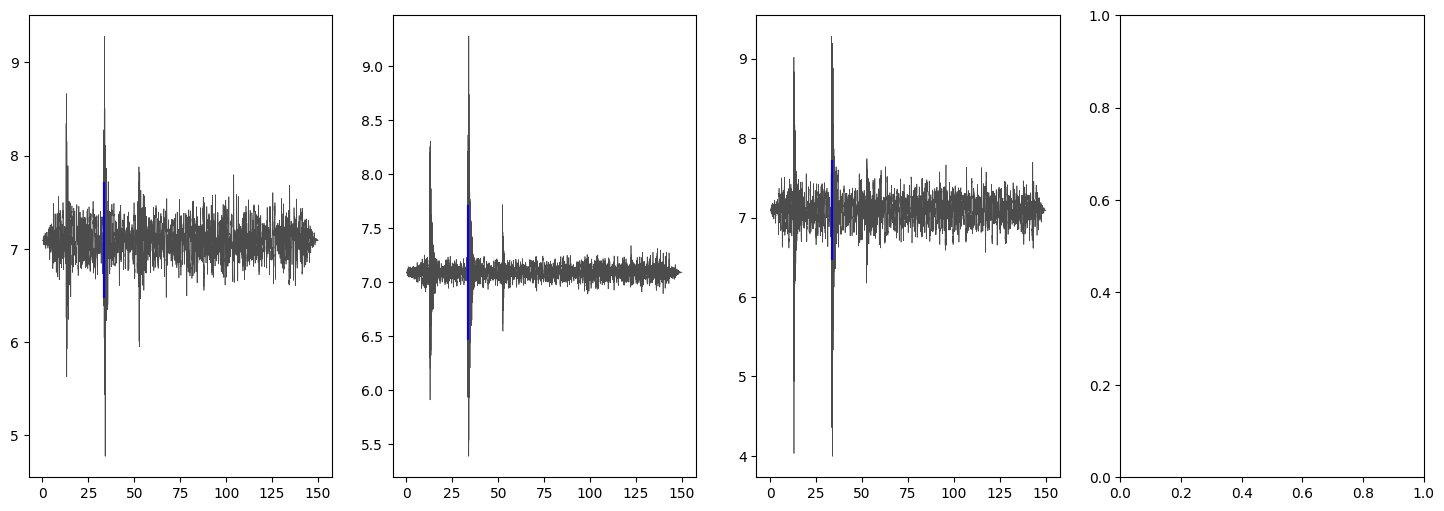

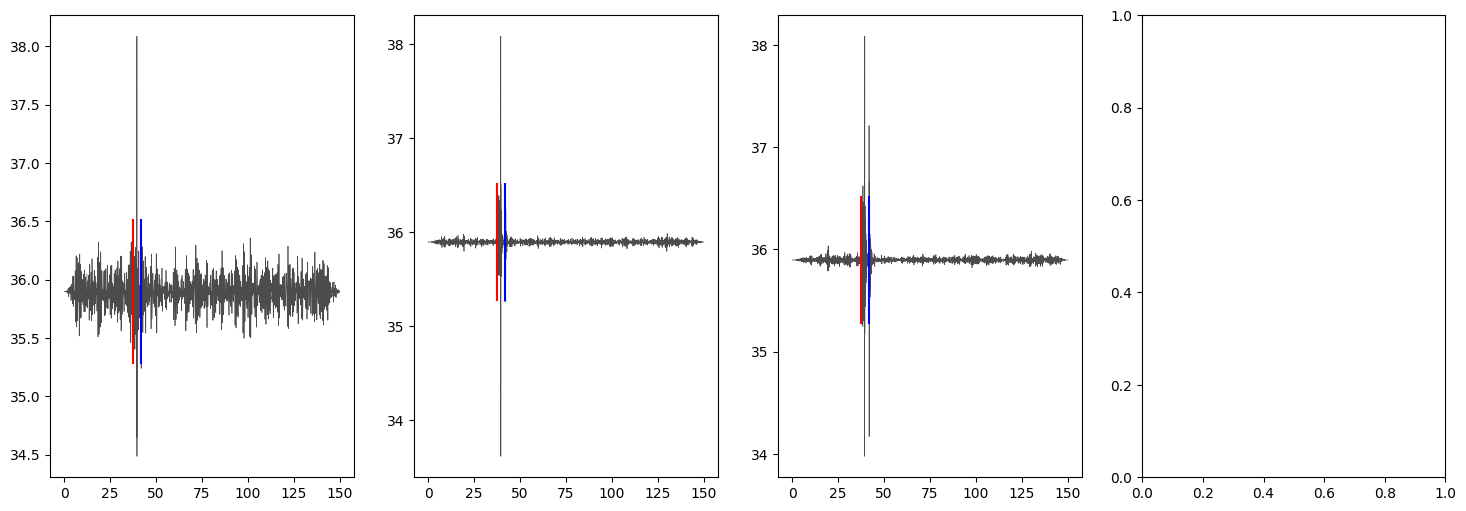

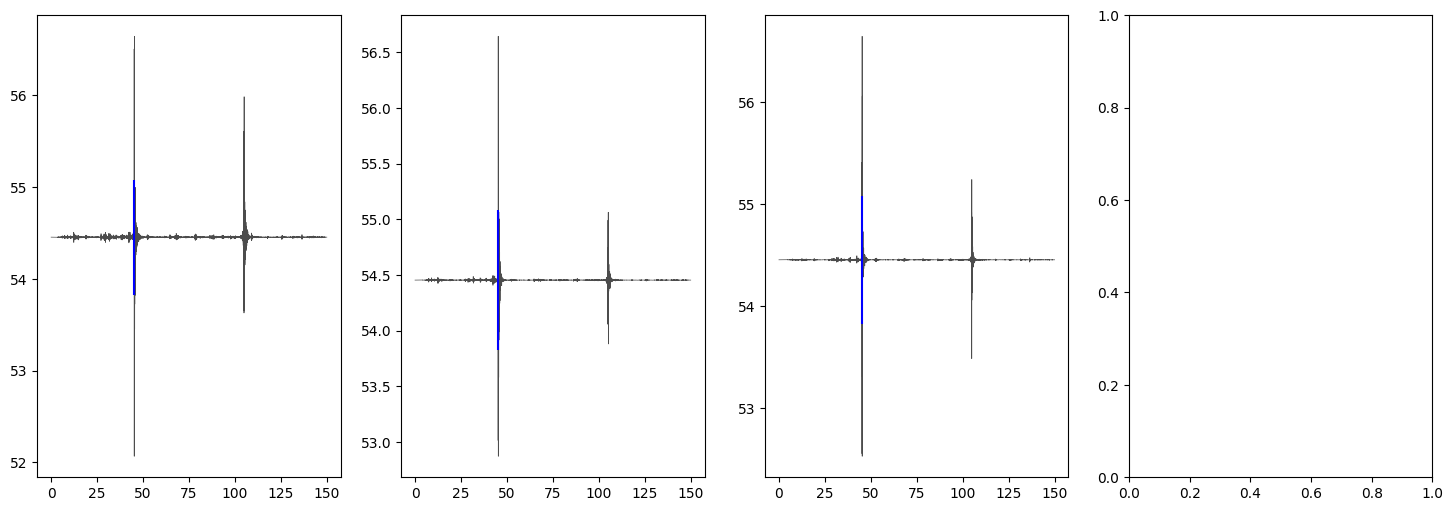

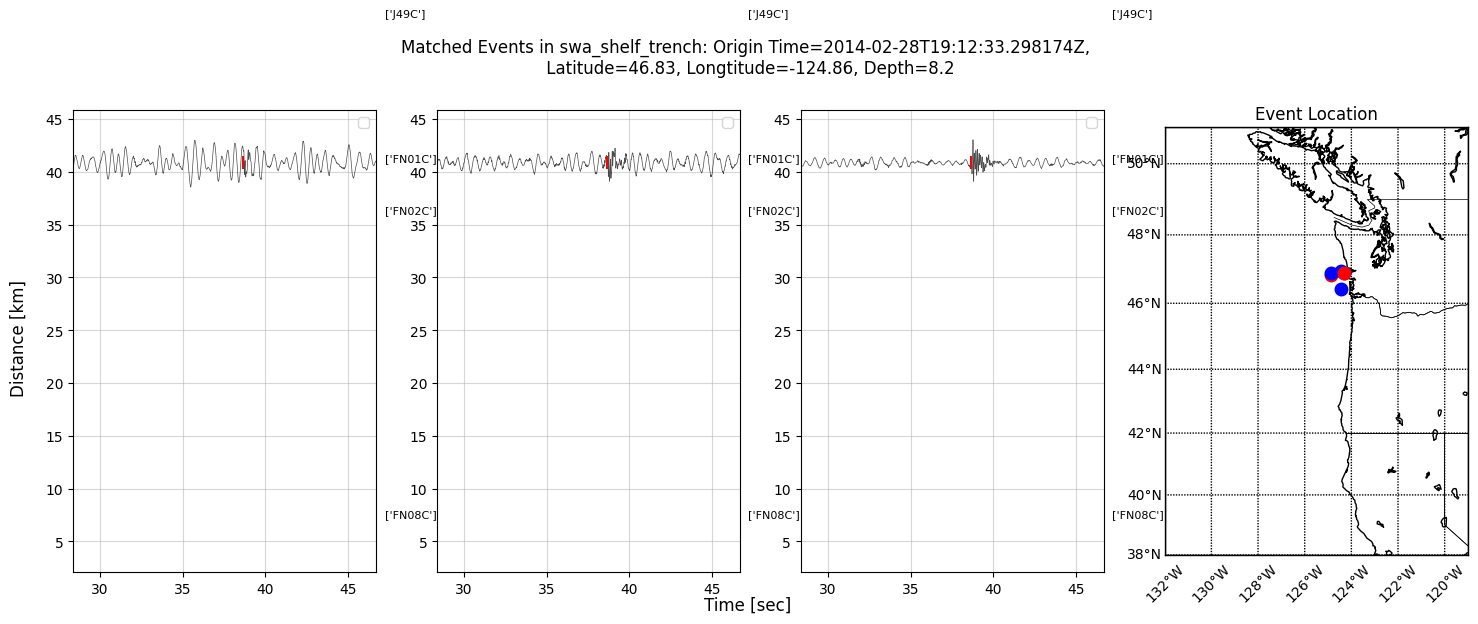

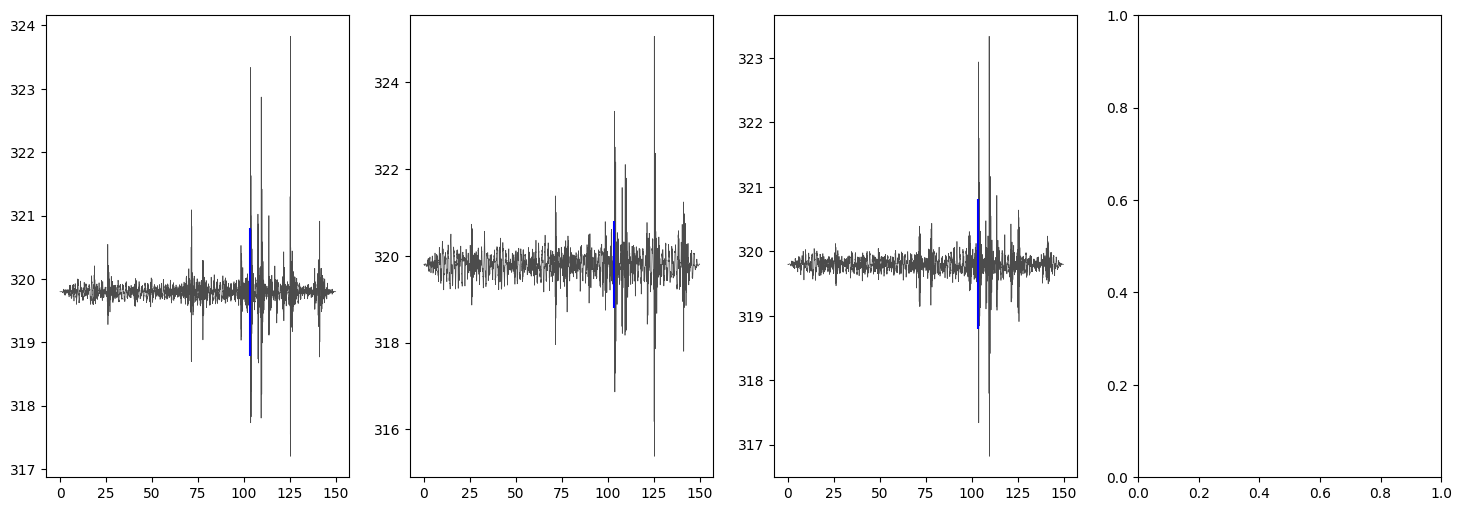

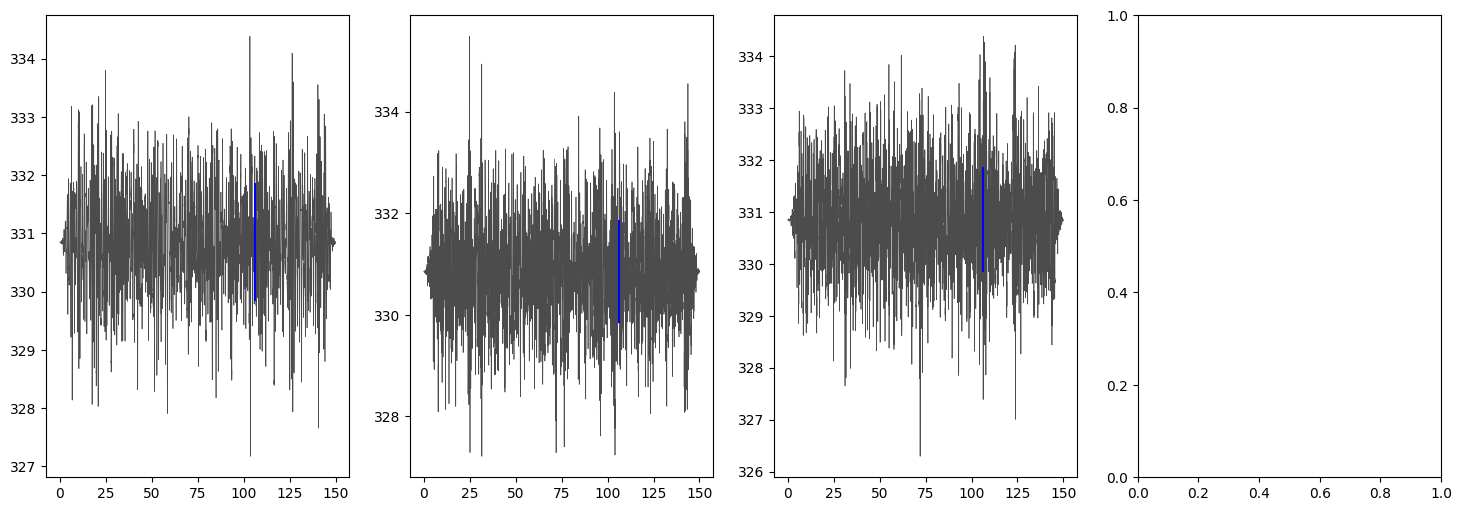

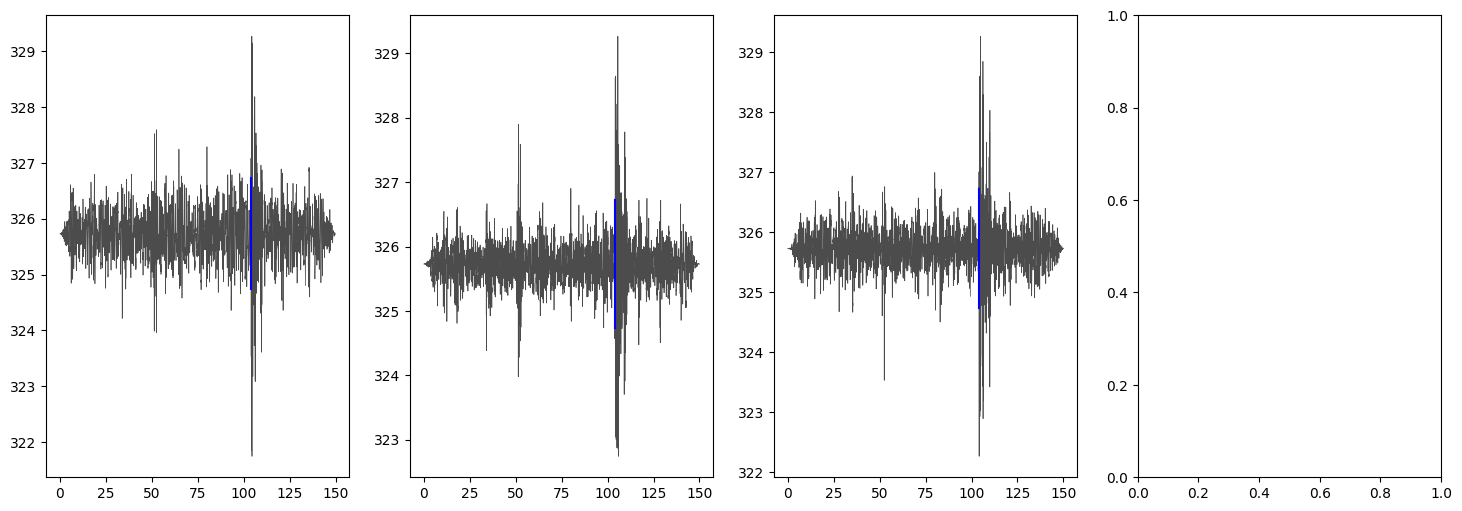

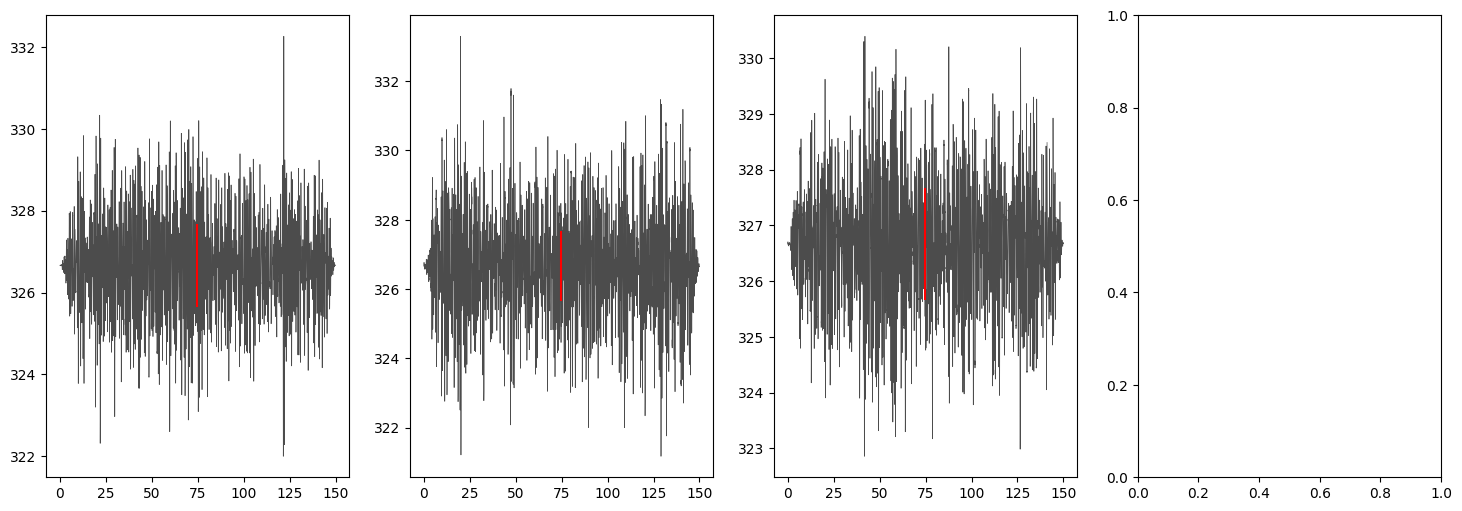

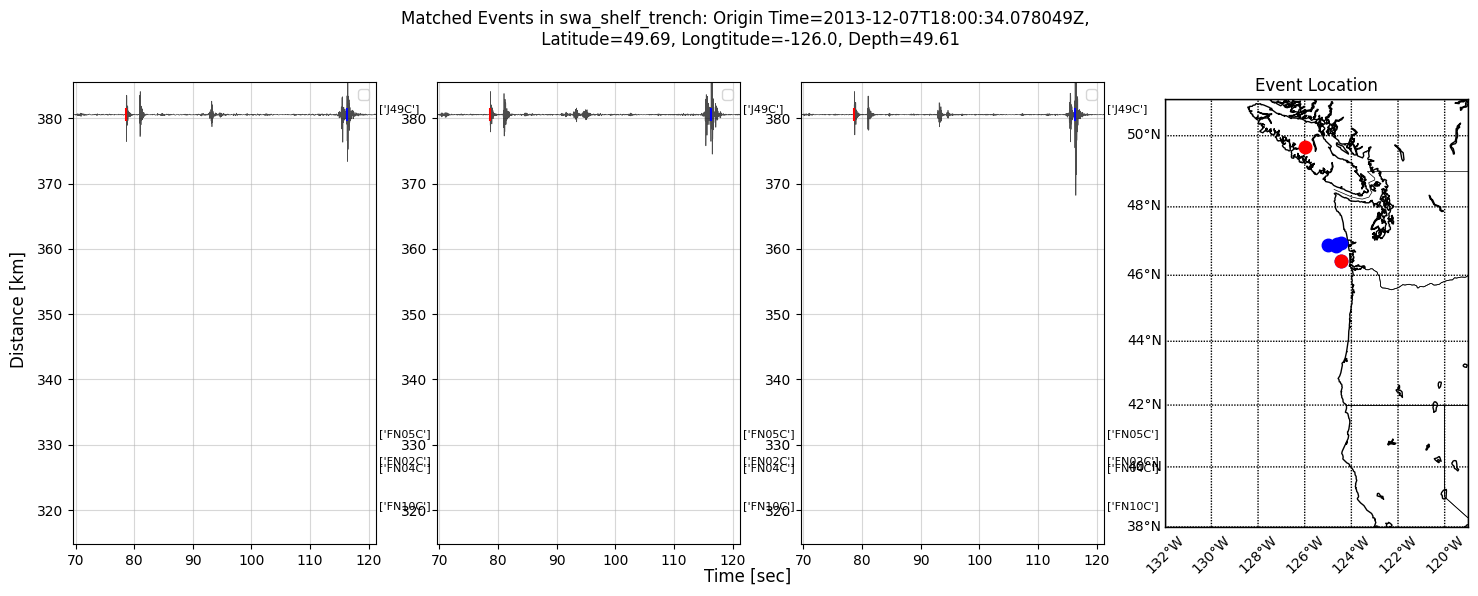

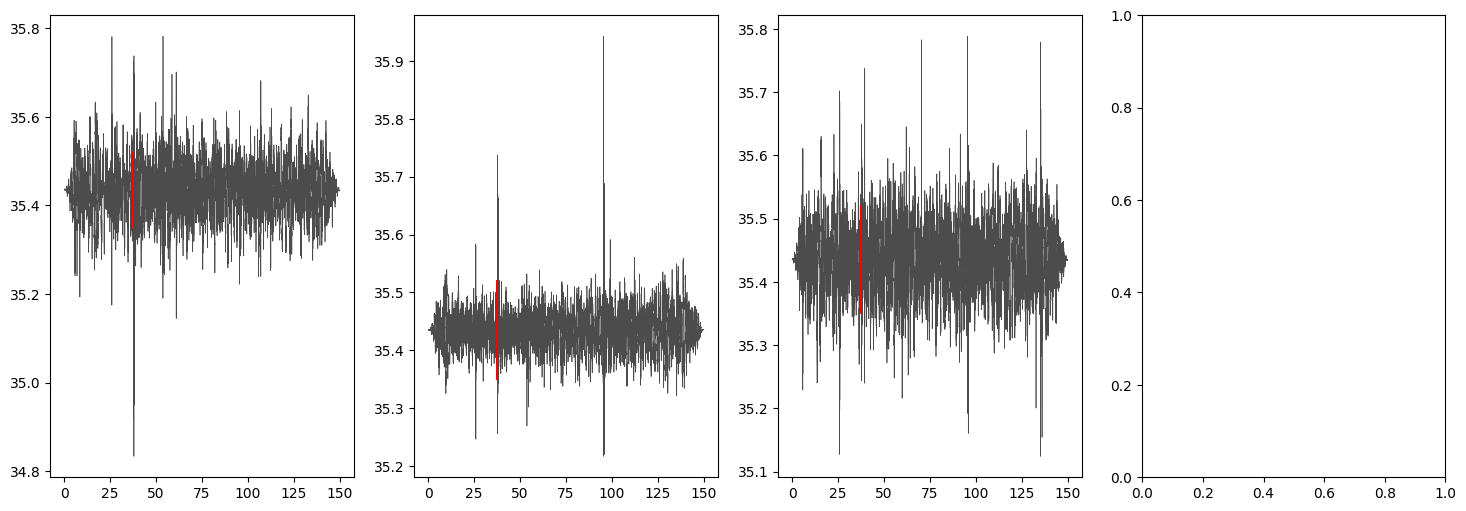

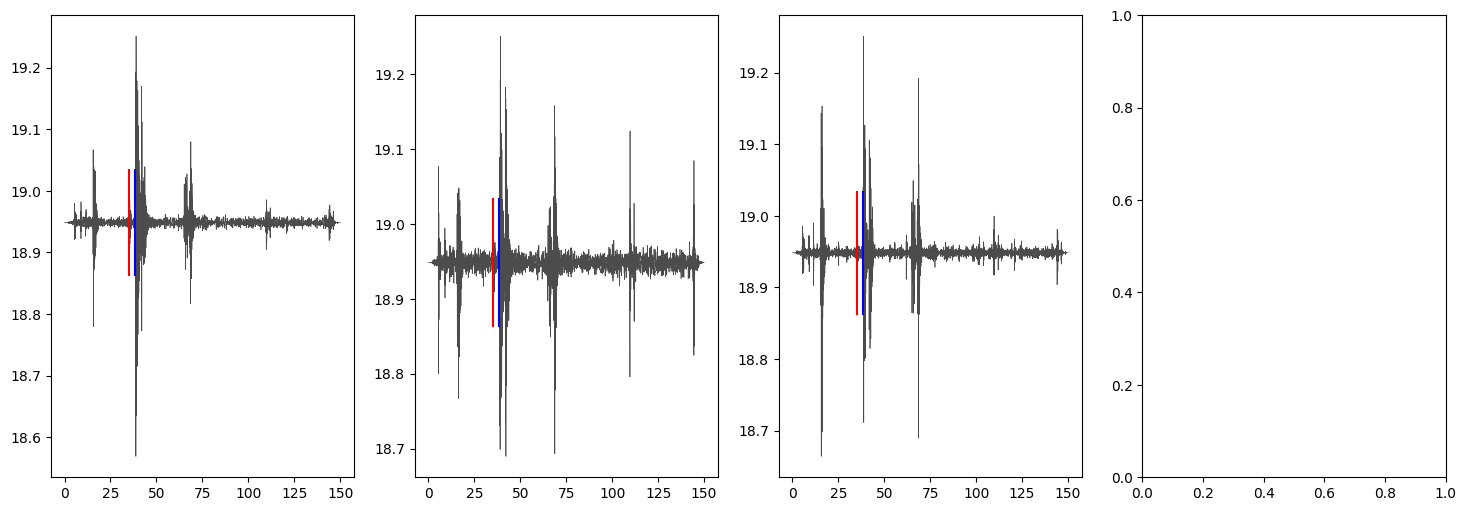

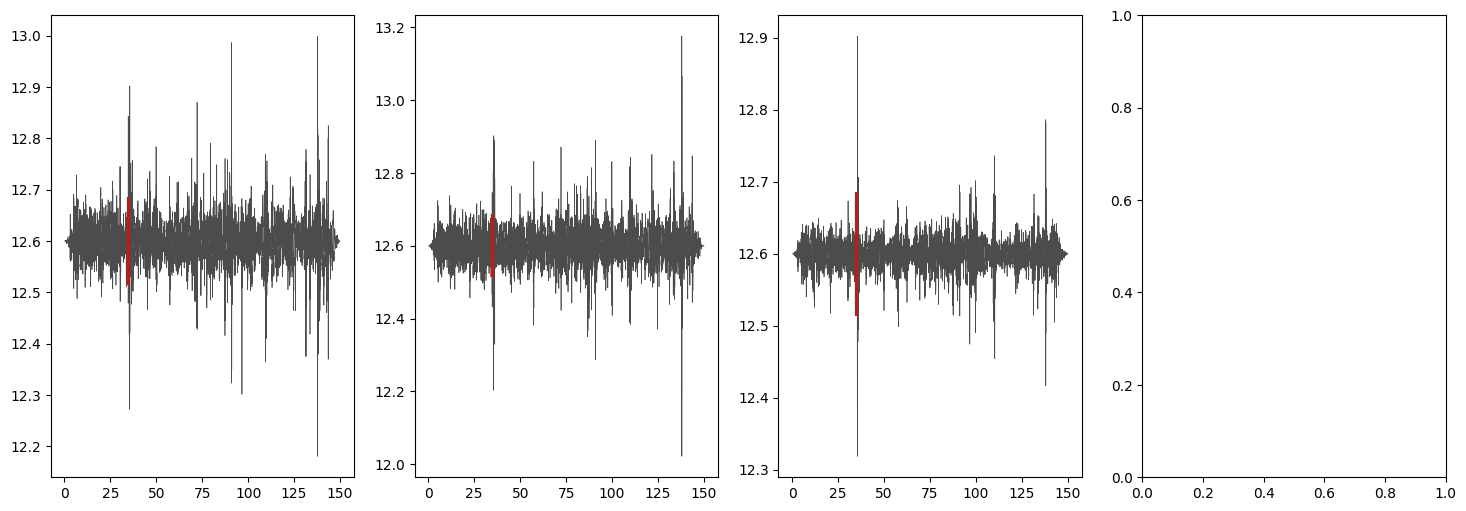

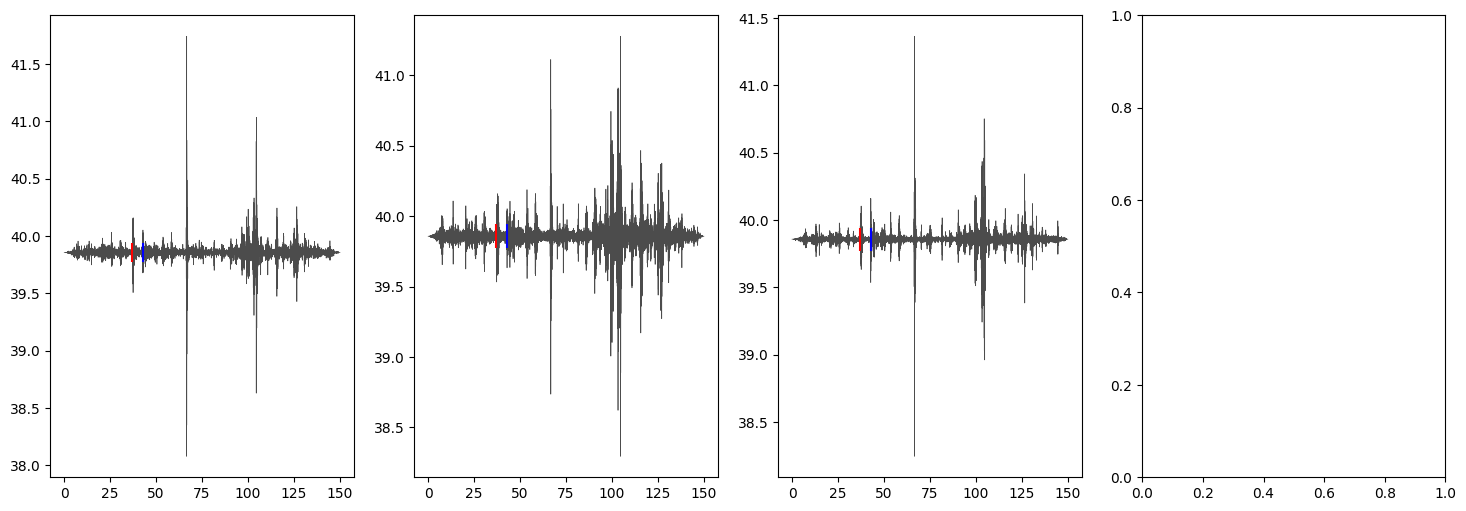

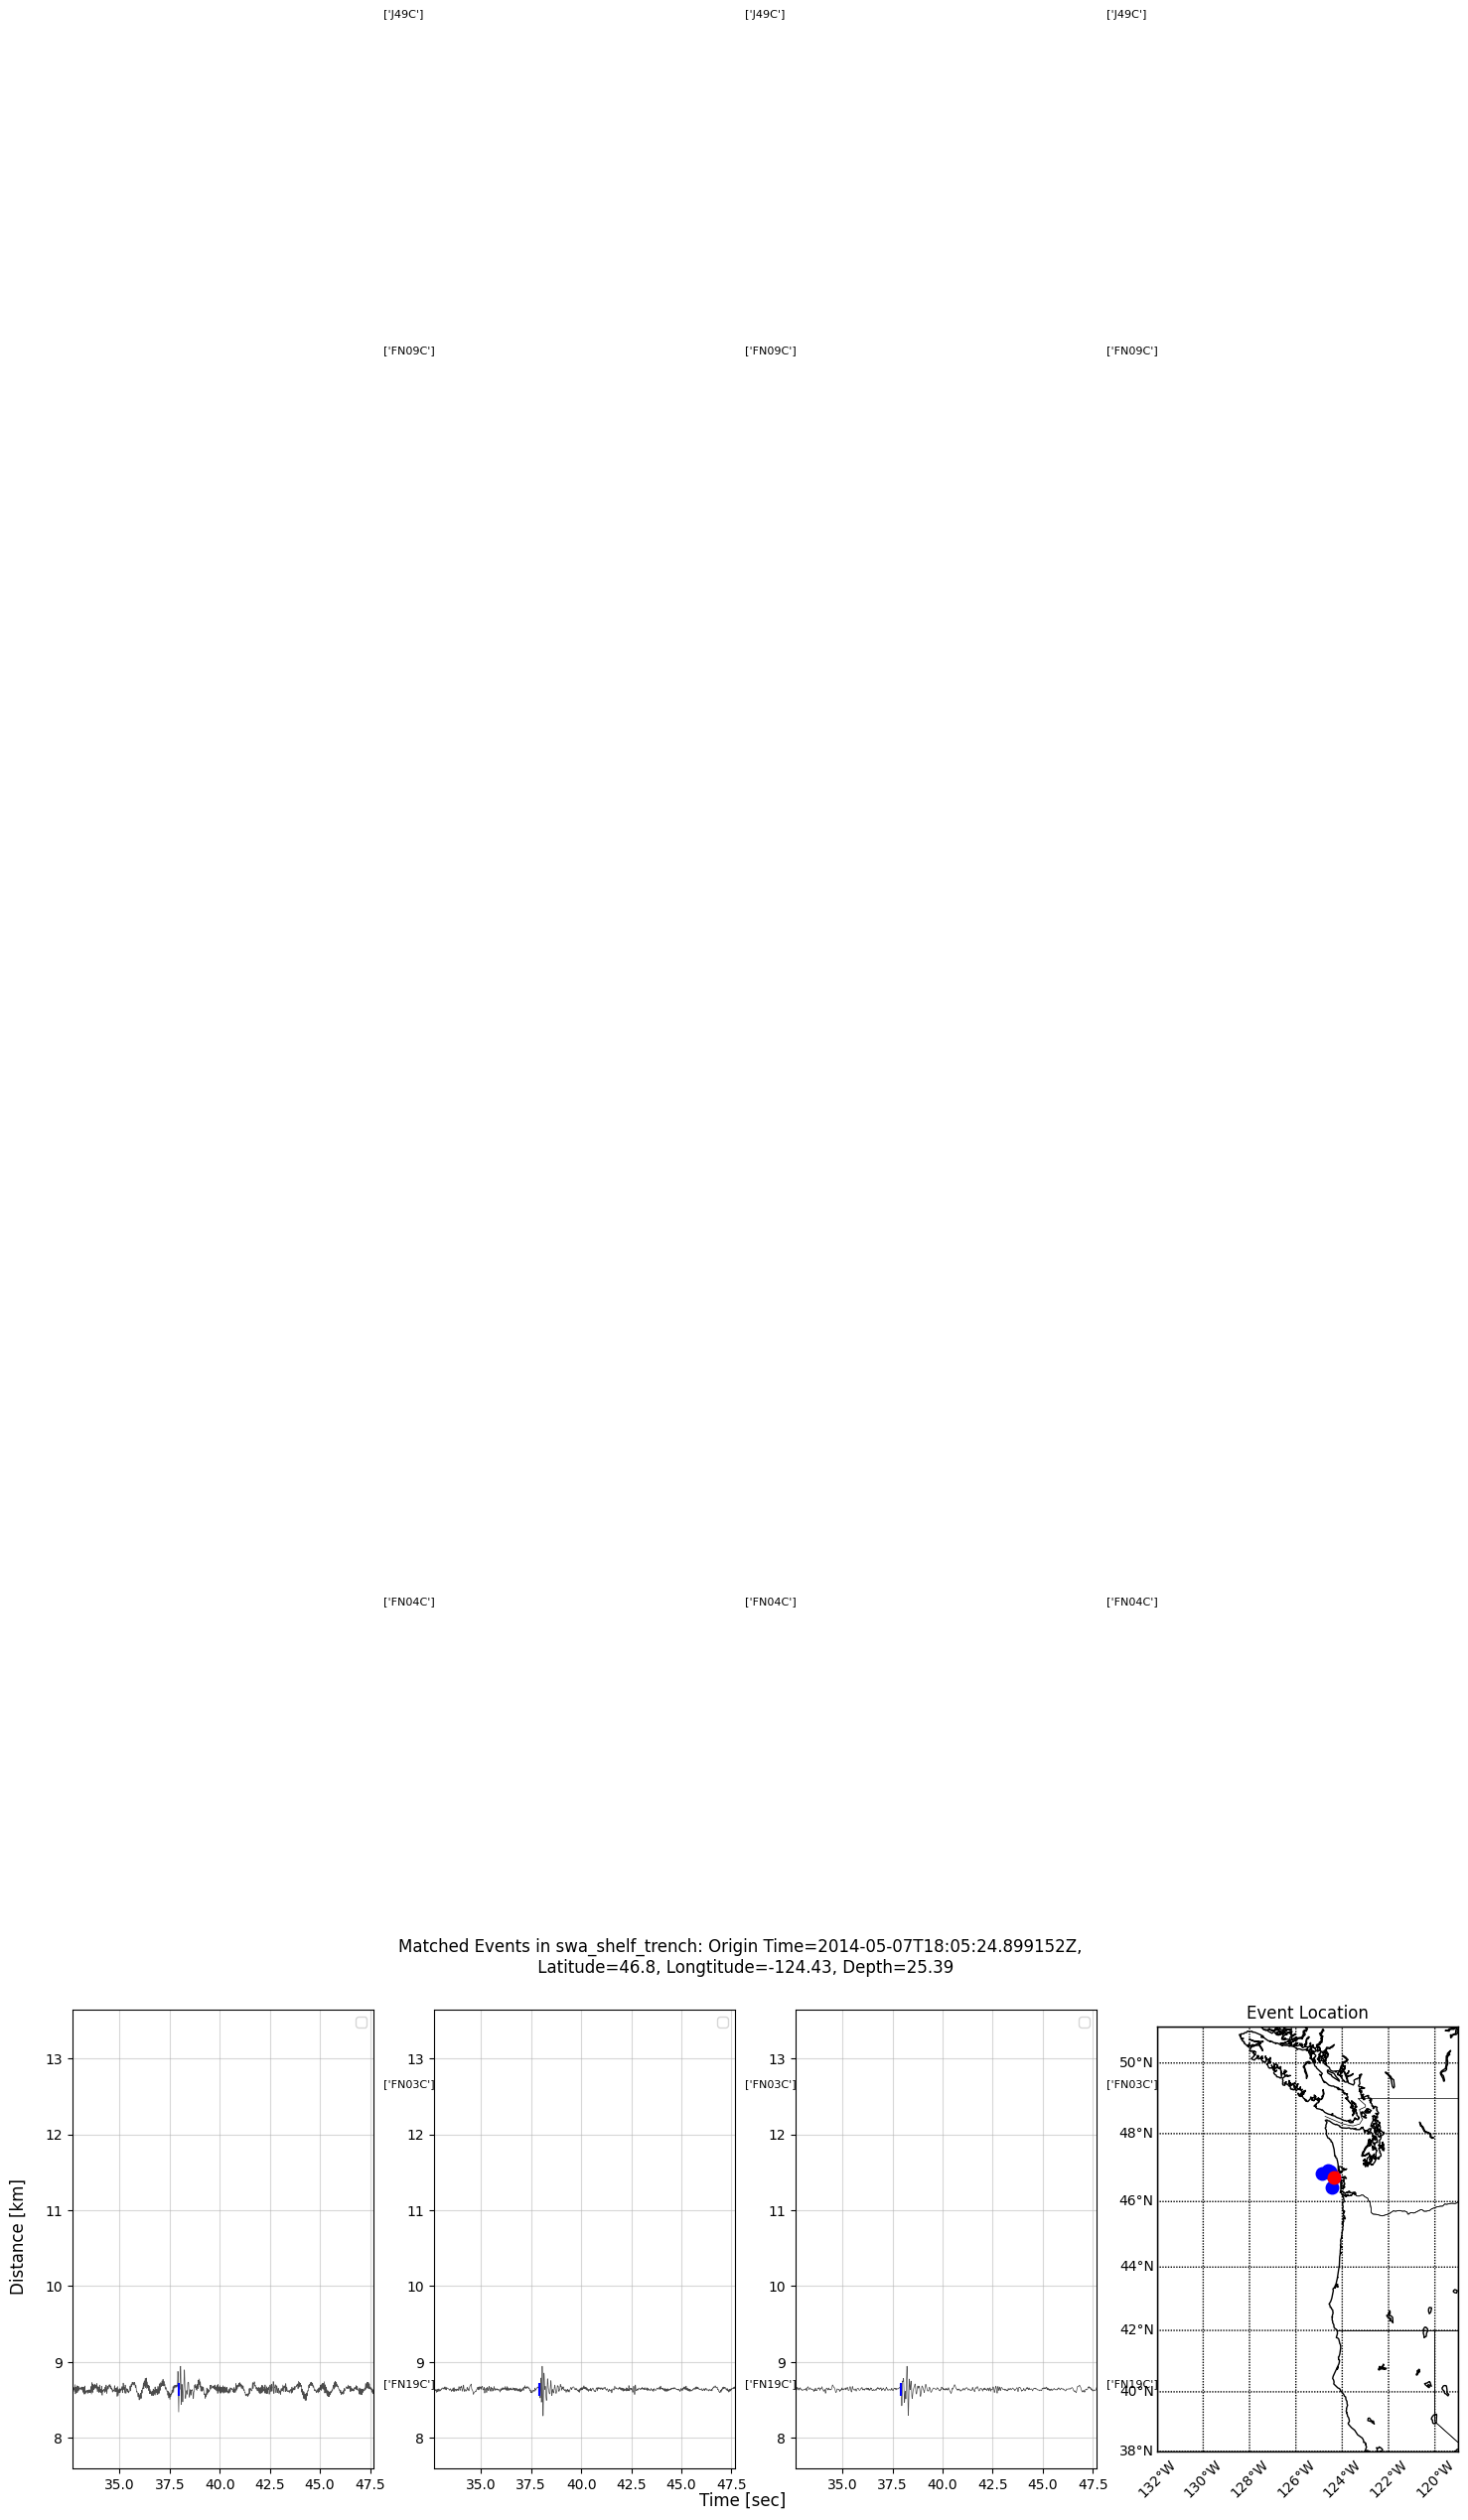

In [34]:
subplots_cluster_scale_rand_original(mycatalog, mycatalog_picks, networks, '?H?', f'Matched Events in {year}', path)

In [17]:
year = 'swa_shore'
mycatalog = pd.read_csv(f'/home/hbito/cascadia_obs_ensemble_backup/data/datasets_{year}/new_events.csv',index_col=0)
mycatalog_picks = pd.read_csv(f'/home/hbito/cascadia_obs_ensemble_backup/data/datasets_{year}/all_pick_assignments_{year}.csv',index_col=0)
networks = pd.read_csv('/home/hbito/cascadia_obs_ensemble_backup/data/networks.csv')

In [8]:
mycatalog_picks

,idx,time,x,y,z,picks,latitude,longitude,depth,event_idx,pick_idx,residual,station,phase,time_pick,pick_id
0,7,2013-09-02 05:42:58.586426+00:00,89.809180,252.936022,5.078125,6,46.769705,-124.324208,5.078125,7,259595,-0.127169,7D.FN03C.,P,1.378101e+09,9377822
1,7,2013-09-02 05:42:58.586426+00:00,89.809180,252.936022,5.078125,6,46.769705,-124.324208,5.078125,7,1635252,-0.177541,7D.FN04C.,S,1.378101e+09,9375925
2,7,2013-09-02 05:42:58.586426+00:00,89.809180,252.936022,5.078125,6,46.769705,-124.324208,5.078125,7,259863,0.567023,7D.FN05C.,P,1.378101e+09,9378379
3,7,2013-09-02 05:42:58.586426+00:00,89.809180,252.936022,5.078125,6,46.769705,-124.324208,5.078125,7,1636339,-0.162729,7D.FN05C.,S,1.378101e+09,9378830
4,7,2013-09-02 05:42:58.586426+00:00,89.809180,252.936022,5.078125,6,46.769705,-124.324208,5.078125,7,258306,-0.231362,7D.FN19C.,P,1.378101e+09,9375230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7425,10636,2014-06-26 01:08:02.810201+00:00,66.380698,267.240042,10.546875,7,46.901101,-124.628817,10.546875,10636,1377072,1.346963,7D.FN03C.,P,1.403745e+09,15621747
7426,10636,2014-06-26 01:08:02.810201+00:00,66.380698,267.240042,10.546875,7,46.901101,-124.628817,10.546875,10636,2694018,-0.489490,7D.FN03C.,S,1.403745e+09,15621711
7427,10636,2014-06-26 01:08:02.810201+00:00,66.380698,267.240042,10.546875,7,46.901101,-124.628817,10.546875,10636,1376033,0.361920,7D.FN04C.,P,1.403745e+09,15618802
7428,10636,2014-06-26 01:08:02.810201+00:00,66.380698,267.240042,10.546875,7,46.901101,-124.628817,10.546875,10636,2692580,-0.889507,7D.FN04C.,S,1.403745e+09,15618814


In [18]:
subplots_cluster_scale_rand(mycatalog, mycatalog_picks, networks, '?H?', f'Matched Events in {year}', f'plots_{year}.pdf')

  0%|          | 0/3 [00:00<?, ?it/s]  0%|          | 0/3 [00:00<?, ?it/s]


FDSNBadRequestException: Bad request. If you think your request was valid please contact the developers.
HTTP Status code: 400
Detailed response of server:



In [19]:
year = 'pnsn_nor'
mycatalog = pd.read_csv(f'/home/hbito/cascadia_obs_ensemble_backup/data/datasets_{year}/new_events.csv',index_col=0)
mycatalog_picks = pd.read_csv(f'/home/hbito/cascadia_obs_ensemble_backup/data/datasets_{year}/all_pick_assignments_{year}.csv',index_col=0)
# mycatalog = mycatalog.loc[(mycatalog['latitude'] < 48)&(mycatalog['latitude'] > 46)&
#                           (mycatalog['longitude'] < -125)&(mycatalog['longitude'] > -127)]
networks = pd.read_csv('/home/hbito/cascadia_obs_ensemble_backup/data/networks.csv')

In [20]:
subplots_cluster_scale_rand(mycatalog, mycatalog_picks, networks, '?H?', f'Newly Found Events by Stations in PNSN Washington', f'plots_{year}.pdf')

  0%|          | 0/3 [00:00<?, ?it/s]


FDSNBadRequestException: Bad request. If you think your request was valid please contact the developers.
HTTP Status code: 400
Detailed response of server:



#### Plot the events in the merged catalog 

In [74]:
mycatalog_merged = pd.read_csv(f'/home/hbito/cascadia_obs_ensemble/data/datasets_all_regions/merged_new_events.csv',index_col=0)
networks = pd.read_csv('/home/hbito/cascadia_obs_ensemble/data/networks.csv')

# Load all event data into a list of DataFrames
event_files = [
    '../data/datasets_nwa_shelf_trench/all_pick_assignments_nwa_shelf_trench.csv',
    '../data/datasets_nwa_shore/all_pick_assignments_nwa_shore.csv',
    '../data/datasets_or_shelf_trench/all_pick_assignments_or_shelf_trench.csv',
    '../data/datasets_or_shore/all_pick_assignments_or_shore.csv',
    '../data/datasets_pnsn_jdf/all_pick_assignments_pnsn_jdf.csv',
    '../data/datasets_pnsn_nor/all_pick_assignments_pnsn_nor.csv',
    '../data/datasets_pnsn_sor/all_pick_assignments_pnsn_sor.csv',
    '../data/datasets_pnsn_wa/all_pick_assignments_pnsn_wa.csv',
    '../data/datasets_swa_shelf_trench/all_pick_assignments_swa_shelf_trench.csv',
    '../data/datasets_swa_shore/all_pick_assignments_swa_shore.csv'
]

# Read all event files into DataFrames
dfs = [pd.read_csv(file, index_col=0) for file in event_files]

# Concatenate all DataFrames into a single DataFrame
mycatalog_picks_merged = pd.concat(dfs)

In [8]:
subplots_cluster_scale_rand(mycatalog_merged, mycatalog_picks_merged, networks, '?H?', 'Merged Events', 'merged_events.pdf')

NameError: name 'mycatalog_merged' is not defined

In [48]:

# Load all the pick assignments 
year = 'all_regions'

# Load all event data into a list of DataFrames
new_events = pd.read_csv(f'../data/datasets_{year}/new_events_merged.csv')

# Pick only the events less than 5 km deep
new_events = new_events[new_events['depth'] < 5].iloc[256:258]

# Load all pick_assignments data into a list of DataFrames
pick_assignment_files = [
    '../data/datasets_nwa_shelf_trench/all_pick_assignments_nwa_shelf_trench.csv',
    '../data/datasets_nwa_shore/all_pick_assignments_nwa_shore.csv',
    '../data/datasets_or_shelf_trench/all_pick_assignments_or_shelf_trench.csv',
    '../data/datasets_or_shore/all_pick_assignments_or_shore.csv',
    '../data/datasets_pnsn_jdf/all_pick_assignments_pnsn_jdf.csv',
    '../data/datasets_pnsn_nor/all_pick_assignments_pnsn_nor.csv',
    '../data/datasets_pnsn_sor/all_pick_assignments_pnsn_sor.csv',
    '../data/datasets_pnsn_wa/all_pick_assignments_pnsn_wa.csv',
    '../data/datasets_swa_shelf_trench/all_pick_assignments_swa_shelf_trench.csv',
    '../data/datasets_swa_shore/all_pick_assignments_swa_shore.csv'
]

# Read all event files into DataFrames
dfs = [pd.read_csv(file, index_col=0) for file in pick_assignment_files]

# Concatenate all DataFrames into a single DataFrame
mycatalog_picks_merged = pd.concat(dfs)

# Load networks
networks = pd.read_csv('../data/networks.csv')

# Define the channels to show in the plot
channel = '?H?'

fig_title = 'New Events (<5 km) from all regions'

filepath = f'../data/datasets_{year}/plots_new_events_<5km.pdf'

In [49]:
new_events

,Unnamed: 0,idx,time,x,y,z,picks,latitude,longitude,depth,event_idx,pick_idx,residual,station,phase,time_pick,datetime
751,2043,380,2011-11-22 23:33:02.346831+00:00,191.332600,-17.409948,0.390625,10,44.318139,-123.101656,0.390625,380,486098,-0.612443,I02D,S,1.322005e+09,2011-11-22 23:33:02.346831+00:00
754,2053,1732,2011-11-24 23:58:30.937693+00:00,68.611982,584.789277,0.390625,7,49.756245,-124.547810,0.390625,1732,1077453,0.631118,SNB,P,1.322179e+09,2011-11-24 23:58:30.937693+00:00


In [50]:
new_events.iloc[1]

Unnamed: 0                                2053
idx                                       1732
time          2011-11-24 23:58:30.937693+00:00
x                                    68.611982
y                                   584.789277
z                                     0.390625
picks                                        7
latitude                             49.756245
longitude                           -124.54781
depth                                 0.390625
event_idx                                 1732
pick_idx                               1077453
residual                              0.631118
station                                    SNB
phase                                        P
time_pick                        1322179134.98
datetime      2011-11-24 23:58:30.937693+00:00
Name: 754, dtype: object

  0%|          | 0/2 [00:00<?, ?it/s]

[[None, 'TA', 'I02D', 63.91282982229358], [None, 'UW', 'BABR', 64.13513398968928], [None, 'TA', 'I03D', 71.81631190798717], [None, 'UW', 'JEDS', 98.51107842888493], [None, 'UO', 'DBO', 133.8616934910794], [None, 'TA', 'J01D', 144.86815247062094], [None, 'TA', 'K02D', 186.0679587466343]]
i: 0
i: 1
i: 2
i: 3
i: 4
i: 5
i: 6


/home/jupyter_share/miniconda3/envs/seismo/lib/python3.9/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (25) of bandpass is at or above Nyquist (20.0). Applying a high-pass instead.
  warnings.warn(msg)
 50%|█████     | 1/2 [00:02<00:02,  2.83s/it]

[[None, 'CN', 'NLLB', 71.38345079678453], [None, 'CN', 'OZB', 112.0208367851407], [None, 'CN', 'LZB', 137.65857856016154], [None, 'CN', 'SNB', 147.85987159409387], [None, 'CN', 'VGZ', 173.87588445508743]]
test4
test4
test4
test4
test4
test4
test4
test4
test4
test4


/home/jupyter_share/miniconda3/envs/seismo/lib/python3.9/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (25) of bandpass is at or above Nyquist (20.0). Applying a high-pass instead.
  warnings.warn(msg)
100%|██████████| 2/2 [00:07<00:00,  3.54s/it]


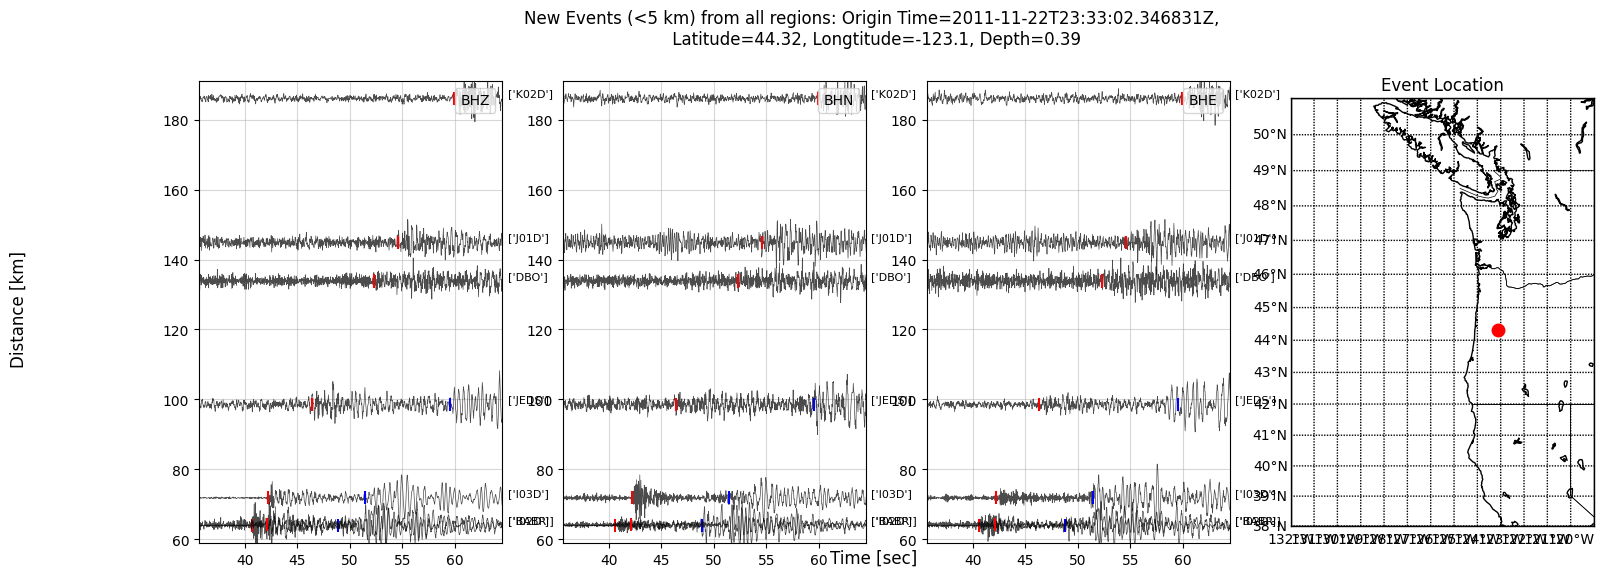

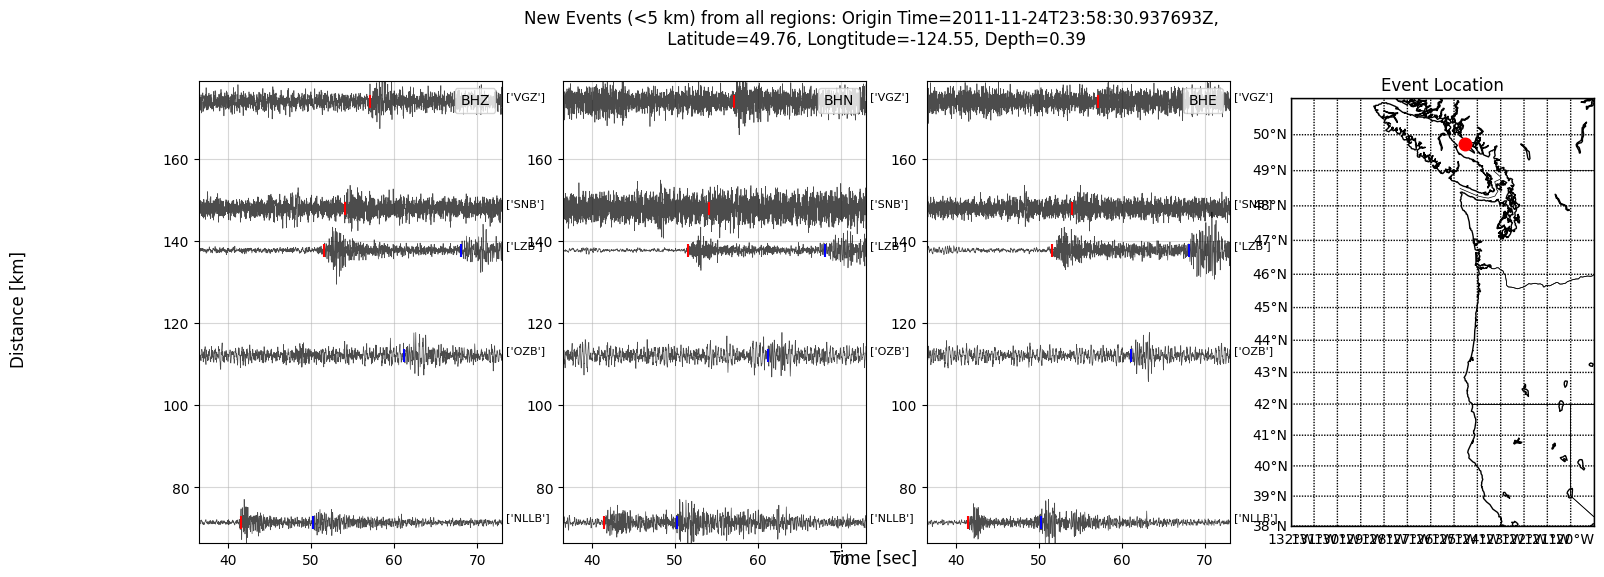

In [69]:
subplots_cluster_scale(new_events, mycatalog_picks_merged, networks, channel, fig_title,filepath)

  0%|          | 0/3 [00:00<?, ?it/s]/home/jupyter_share/miniconda3/envs/seismo/lib/python3.9/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (25) of bandpass is at or above Nyquist (20.0). Applying a high-pass instead.
  warnings.warn(msg)
 33%|███▎      | 1/3 [00:03<00:07,  3.55s/it]/home/jupyter_share/miniconda3/envs/seismo/lib/python3.9/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (25) of bandpass is at or above Nyquist (20.0). Applying a high-pass instead.
  warnings.warn(msg)
 67%|██████▋   | 2/3 [00:06<00:03,  3.23s/it]/home/jupyter_share/miniconda3/envs/seismo/lib/python3.9/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (25) of bandpass is at or above Nyquist (20.0). Applying a high-pass instead.
  warnings.warn(msg)
100%|██████████| 3/3 [00:09<00:00,  3.12s/it]


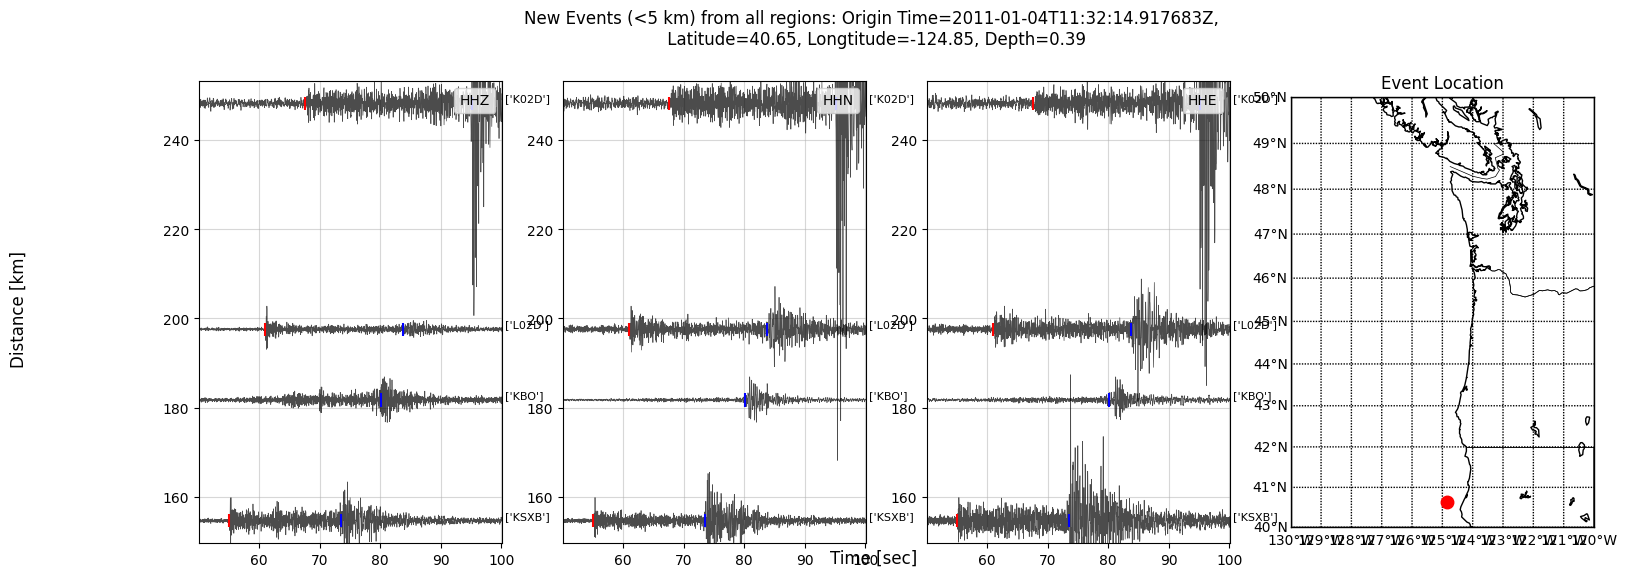

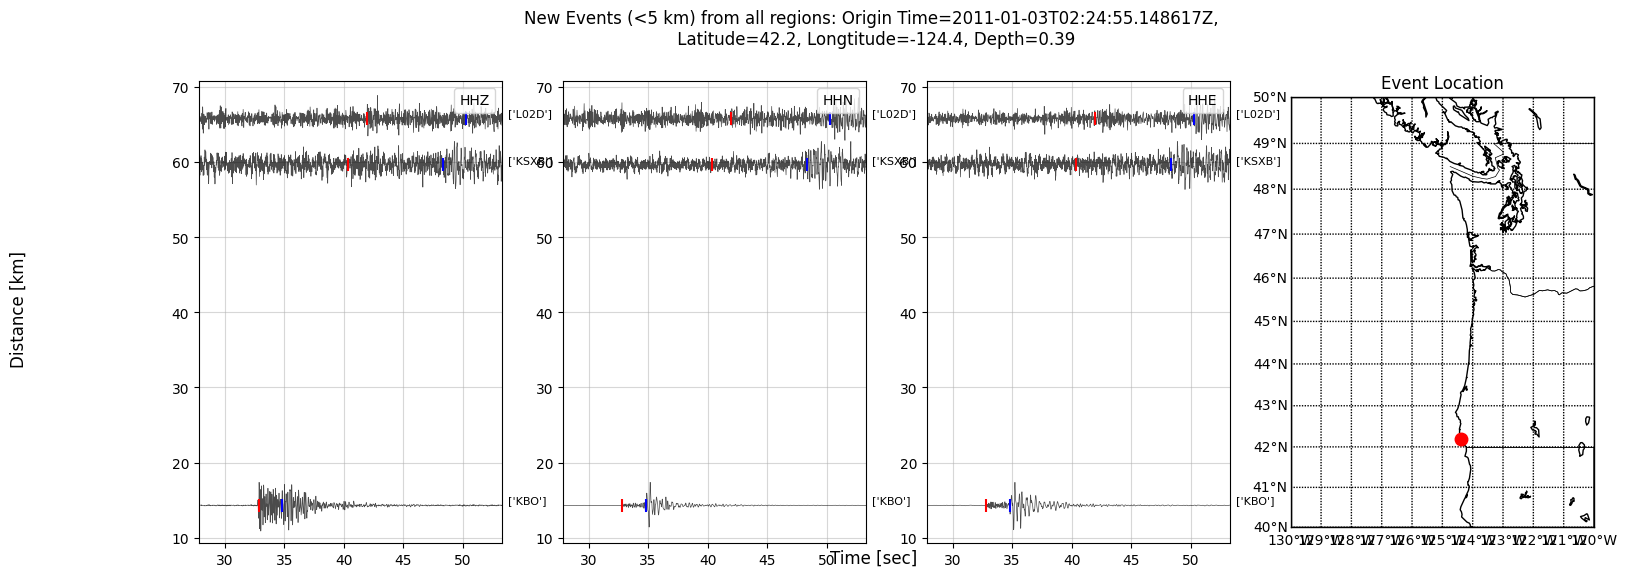

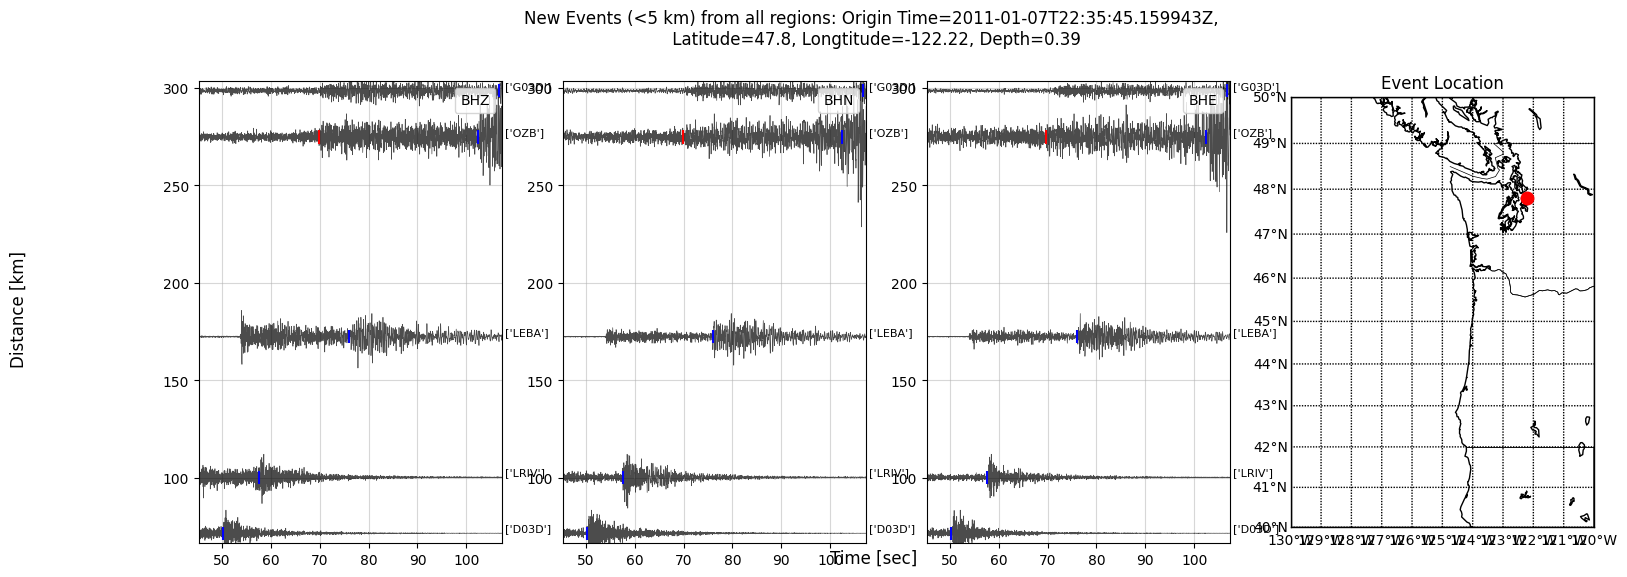

In [81]:
subplots_cluster_scale_rand(new_events, mycatalog_picks_merged, networks, channel, fig_title,filepath)